In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_parquet('../data/financial_data_enriched_1.parquet')
df.drop(columns=['user_id', 'region', 'record_date'], inplace=True)

In [17]:
df

age  gender marital_status education_level employment_status  \
0       56  Female        married     High School     Self-employed   
1       19  Female         single             PhD          Employed   
2       20  Female        married          Master          Employed   
3       25    Male        married             PhD          Employed   
4       53  Female         single             PhD          Employed   
...    ...     ...            ...             ...               ...   
32419   30  Female        married     High School          Employed   
32420   51  Female         single          Master          Employed   
32421   18  Female         single        Bachelor     Self-employed   
32422   36   Other        married     High School     Self-employed   
32423   39  Female        married          Master          Employed   

         job_title  monthly_income_usd  monthly_expenses_usd  savings_usd  \
0      Salesperson             3531.69               1182.59    367655.03   
1      Salesperson             3531.73               2367.99    260869.10   
2          Teacher             2799.49               1003.91    230921.21   
3          Manager             5894.88               4440.12    304815.51   
4          Student             5128.93               4137.61    461509.48   
...            ...                 ...                   ...          ...   
32419  Salesperson             4266.87               1510.82    273669.70   
32420      Student             5725.78               4965.02     17247.57   
32421       Doctor             3282.38               2243.77     22081.21   
32422   Accountant             5035.99               4054.32    524039.88   
32423     Engineer             4410.19               2866.47    176985.54   

       has_deposit  ...  loan_type loan_amount_usd loan_term_months  \
0                0  ...       None            0.00                0   
1                0  ...  Education       146323.34               36   
2                0  ...       None            0.00                0   
3                0  ...   Business        93242.37               24   
4                0  ...       None            0.00                0   
...            ...  ...        ...             ...              ...   
32419            0  ...        Car       498400.74              120   
32420            0  ...       Home        83602.57               12   
32421            0  ...       None            0.00                0   
32422            0  ...       None            0.00                0   
32423            0  ...       None            0.00                0   

       monthly_emi_usd  loan_interest_rate_pct  debt_to_income_ratio  \
0                 0.00                    0.00                  0.00   
1              4953.50                   13.33                  1.40   
2                 0.00                    0.00                  0.00   
3              4926.57                   23.93                  0.84   
4                 0.00                    0.00                  0.00   
...                ...                     ...                   ...   
32419          6227.54                    8.68                  1.46   
32420          7605.13                   16.50                  1.33   
32421             0.00                    0.00                  0.00   
32422             0.00                    0.00                  0.00   
32423             0.00                    0.00                  0.00   

       credit_score  savings_to_income_ratio  age_bucket  responsiveness  
0               430                     8.68       51-65        0.205321  
1               543                     6.16       18-25        0.162983  
2               754                     6.87       18-25        0.229039  
3               461                     4.31       18-25        0.650885  
4               516                     7.50       51-65        0.806334  
...             ...                      ...         ...     

In [32]:
df.drop(columns=['user_id', 'region', 'record_date'], inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32424 entries, 0 to 32423
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      32424 non-null  int64  
 1   gender                   32424 non-null  object 
 2   marital_status           32424 non-null  object 
 3   education_level          32424 non-null  object 
 4   employment_status        32424 non-null  object 
 5   job_title                32424 non-null  object 
 6   monthly_income_usd       32424 non-null  float64
 7   monthly_expenses_usd     32424 non-null  float64
 8   savings_usd              32424 non-null  float64
 9   has_deposit              32424 non-null  int64  
 10  deposit_interest_rate    4798 non-null   float64
 11  has_loan                 32424 non-null  object 
 12  loan_type                12995 non-null  object 
 13  loan_amount_usd          32424 non-null  float64
 14  loan_term_months      

In [13]:
df.describe().T

count           mean            std     min  \
age                      32424.0      43.415865      14.978246   18.00   
monthly_income_usd       32424.0    4027.863185    1916.773353  500.00   
monthly_expenses_usd     32424.0    2419.444709    1388.893084  150.01   
savings_usd              32424.0  243752.036091  191577.189517  635.96   
has_deposit              32424.0       0.147977       0.355082    0.00   
deposit_interest_rate     4798.0       1.978281       1.490076    0.75   
loan_amount_usd          32424.0  100114.735992  152536.588635    0.00   
loan_term_months         32424.0      58.500000     104.865373    0.00   
monthly_emi_usd          32424.0    3092.992339    6478.939776    0.00   
loan_interest_rate_pct   32424.0       6.616332       9.472964    0.00   
debt_to_income_ratio     32424.0       1.194881       3.761964    0.00   
credit_score             32424.0     575.260424     159.023227  300.00   
savings_to_income_ratio  32424.0       5.045431       2.851344    0.10   
responsiveness           32424.0       0.465494       0.264553    0.05   

                                  25%            50%            75%  \
age                         30.000000      43.000000      56.000000   
monthly_income_usd        2657.795000    3997.740000    5351.607500   
monthly_expenses_usd      1397.497500    2219.575000    3254.037500   
savings_usd              86291.550000  201700.330000  358966.217500   
has_deposit                  0.000000       0.000000       0.000000   
deposit_interest_rate        1.080000       1.360000       1.770000   
loan_amount_usd              0.000000       0.000000  189499.070000   
loan_term_months             0.000000       0.000000      60.000000   
monthly_emi_usd              0.000000       0.000000    3574.567500   
loan_interest_rate_pct       0.000000       0.000000      13.140000   
debt_to_income_ratio         0.000000       0.000000       0.920000   
credit_score               437.000000     575.000000     714.000000   
savings_to_income_ratio      2.580000       5.040000       7.510000   
responsiveness               0.217328       0.370125       0.719129   

                                max  
age                           69.00  
monthly_income_usd         12404.05  
monthly_expenses_usd       10082.71  
savings_usd              1237774.39  
has_deposit                    1.00  
deposit_interest_rate          5.66  
loan_amount_usd           499954.75  
loan_term_months             360.00  
monthly_emi_usd            47723.84  
loan_interest_rate_pct        30.00  
debt_to_income_ratio          90.67  
credit_score                 850.00  
savings_to_income_ratio       10.00  
responsiveness                 0.98

Missing Values:
age                            0
gender                         0
marital_status                 0
education_level                0
employment_status              0
job_title                      0
monthly_income_usd             0
monthly_expenses_usd           0
savings_usd                    0
has_deposit                    0
deposit_interest_rate      27626
has_loan                       0
loan_type                  19429
loan_amount_usd                0
loan_term_months               0
monthly_emi_usd                0
loan_interest_rate_pct         0
debt_to_income_ratio           0
credit_score                   0
savings_to_income_ratio        0
age_bucket                     0
responsiveness                 0
dtype: int64


Numerical columns: ['age', 'monthly_income_usd', 'monthly_expenses_usd', 'savings_usd', 'has_deposit', 'deposit_interest_rate', 'loan_amount_usd', 'loan_term_months', 'monthly_emi_usd', 'loan_interest_rate_pct', 'debt_to_income_ratio', 'credit

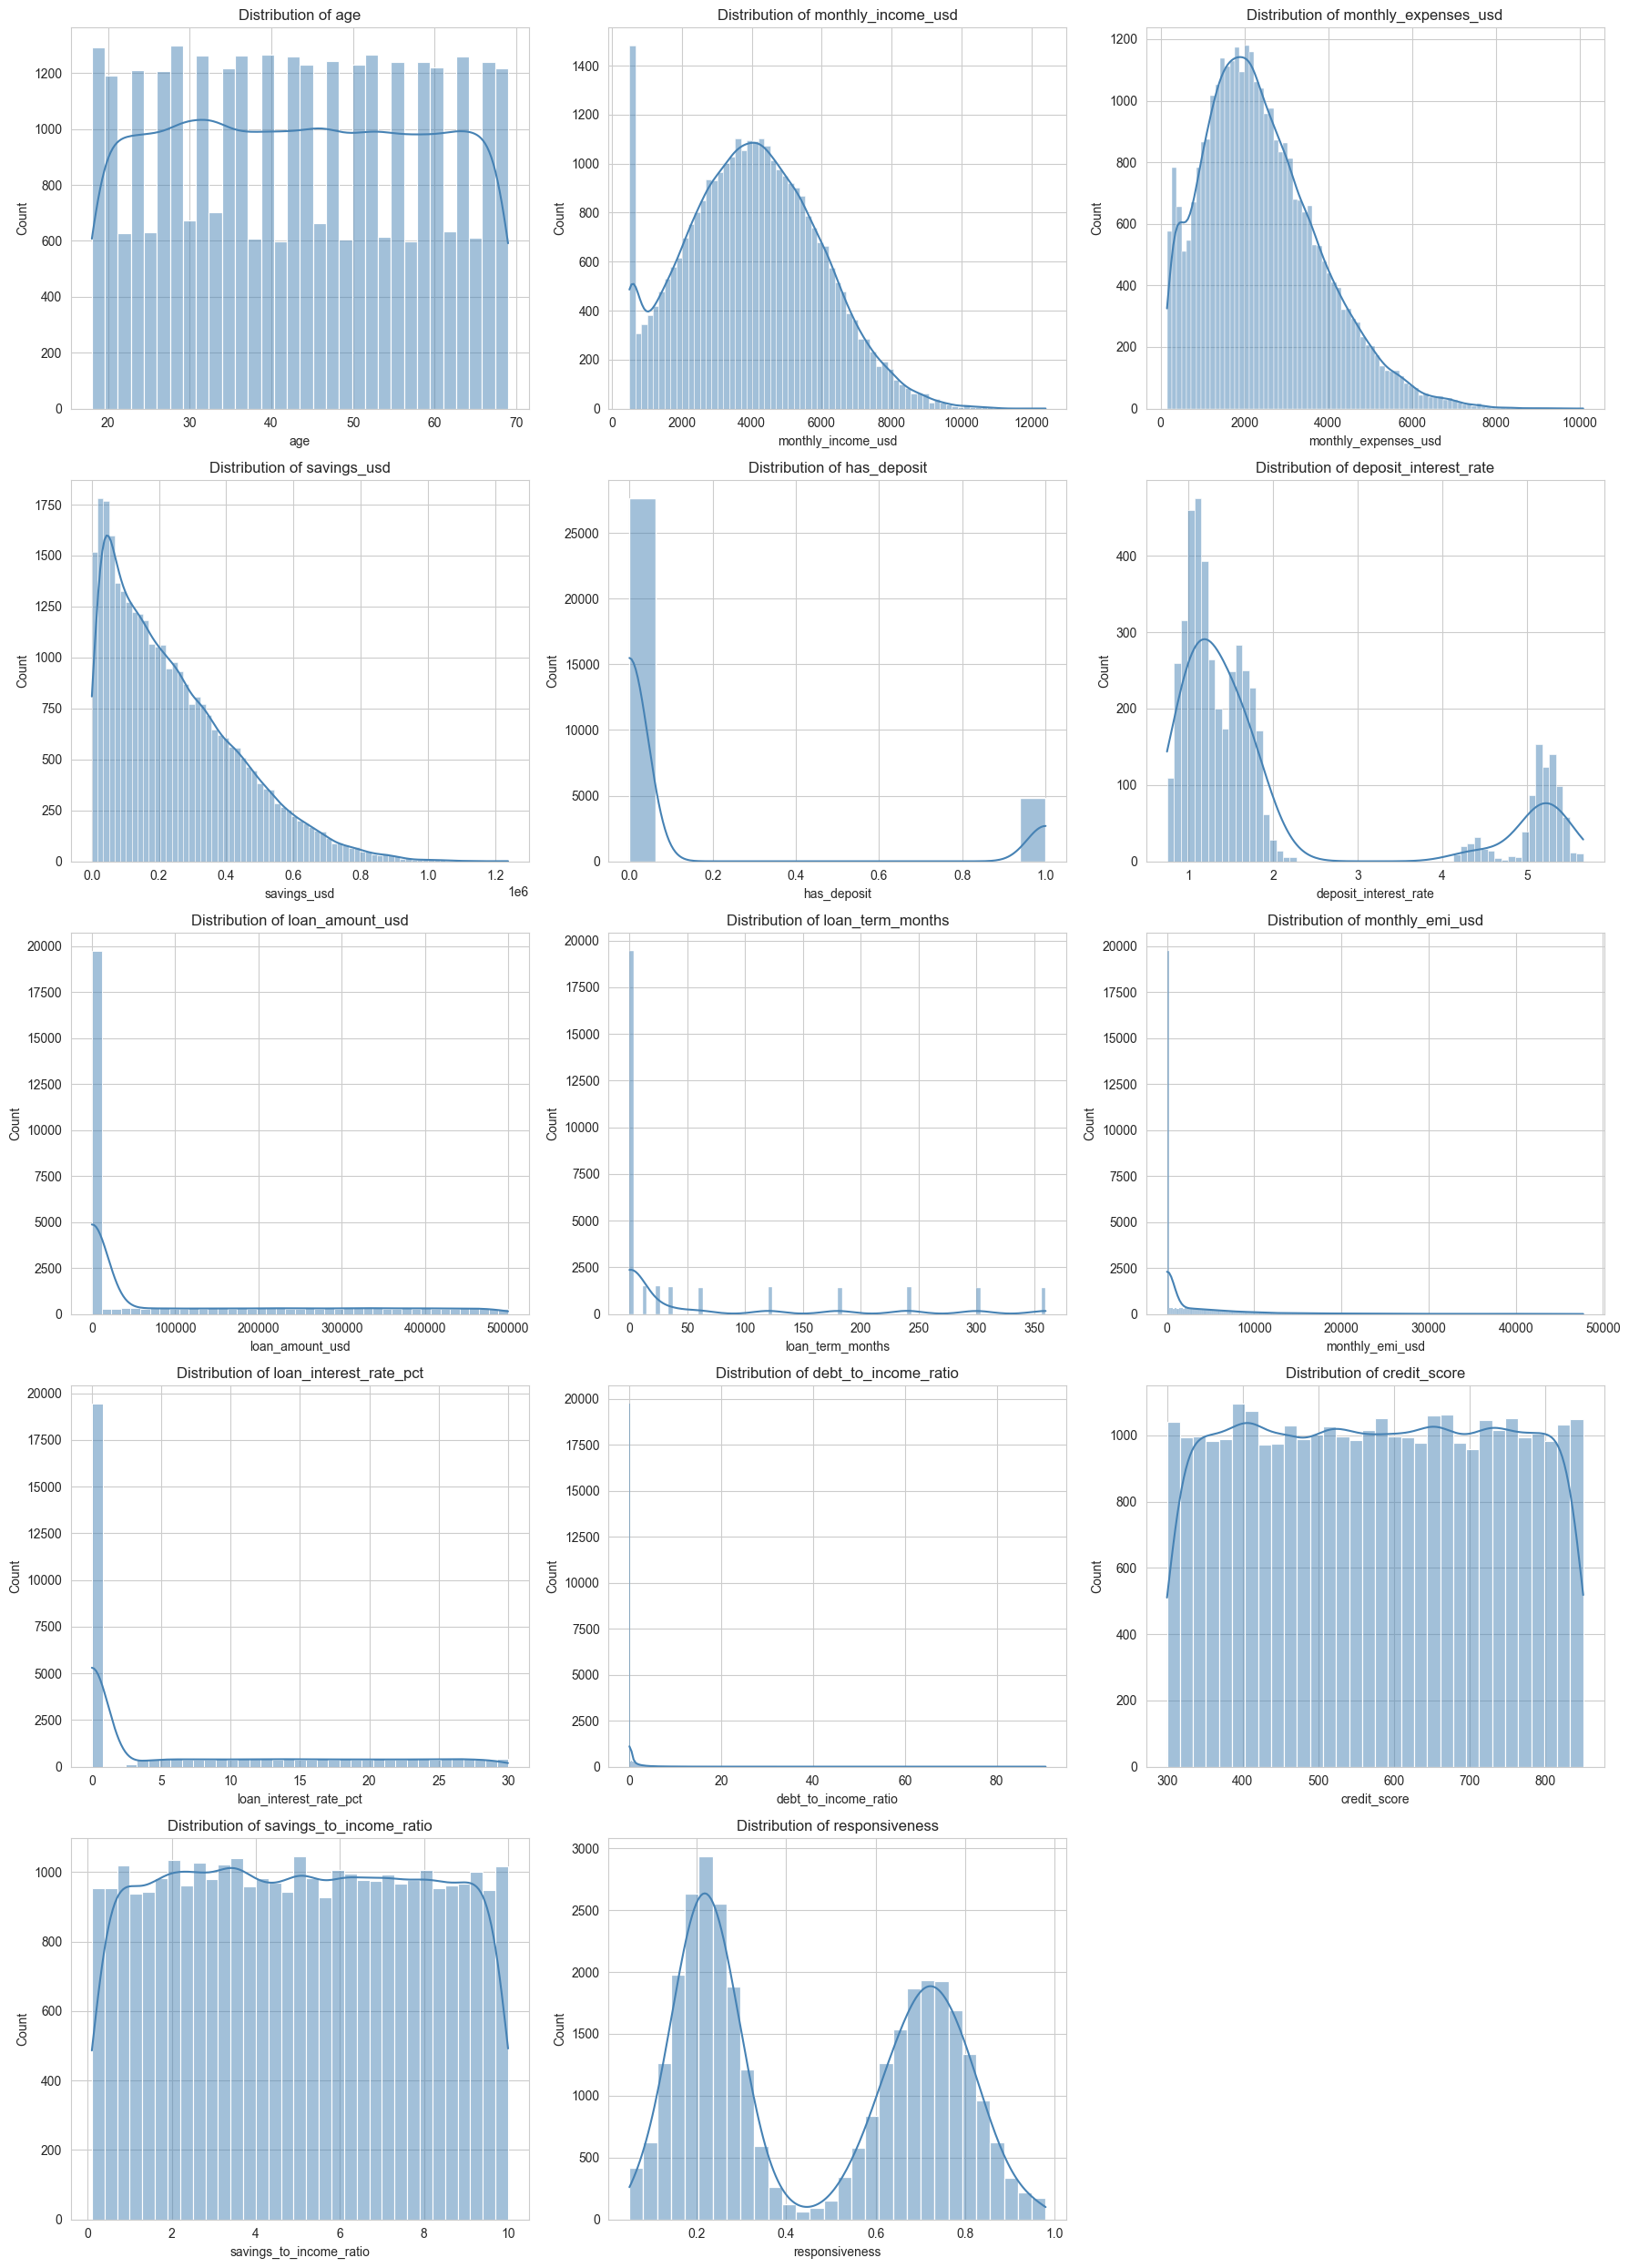

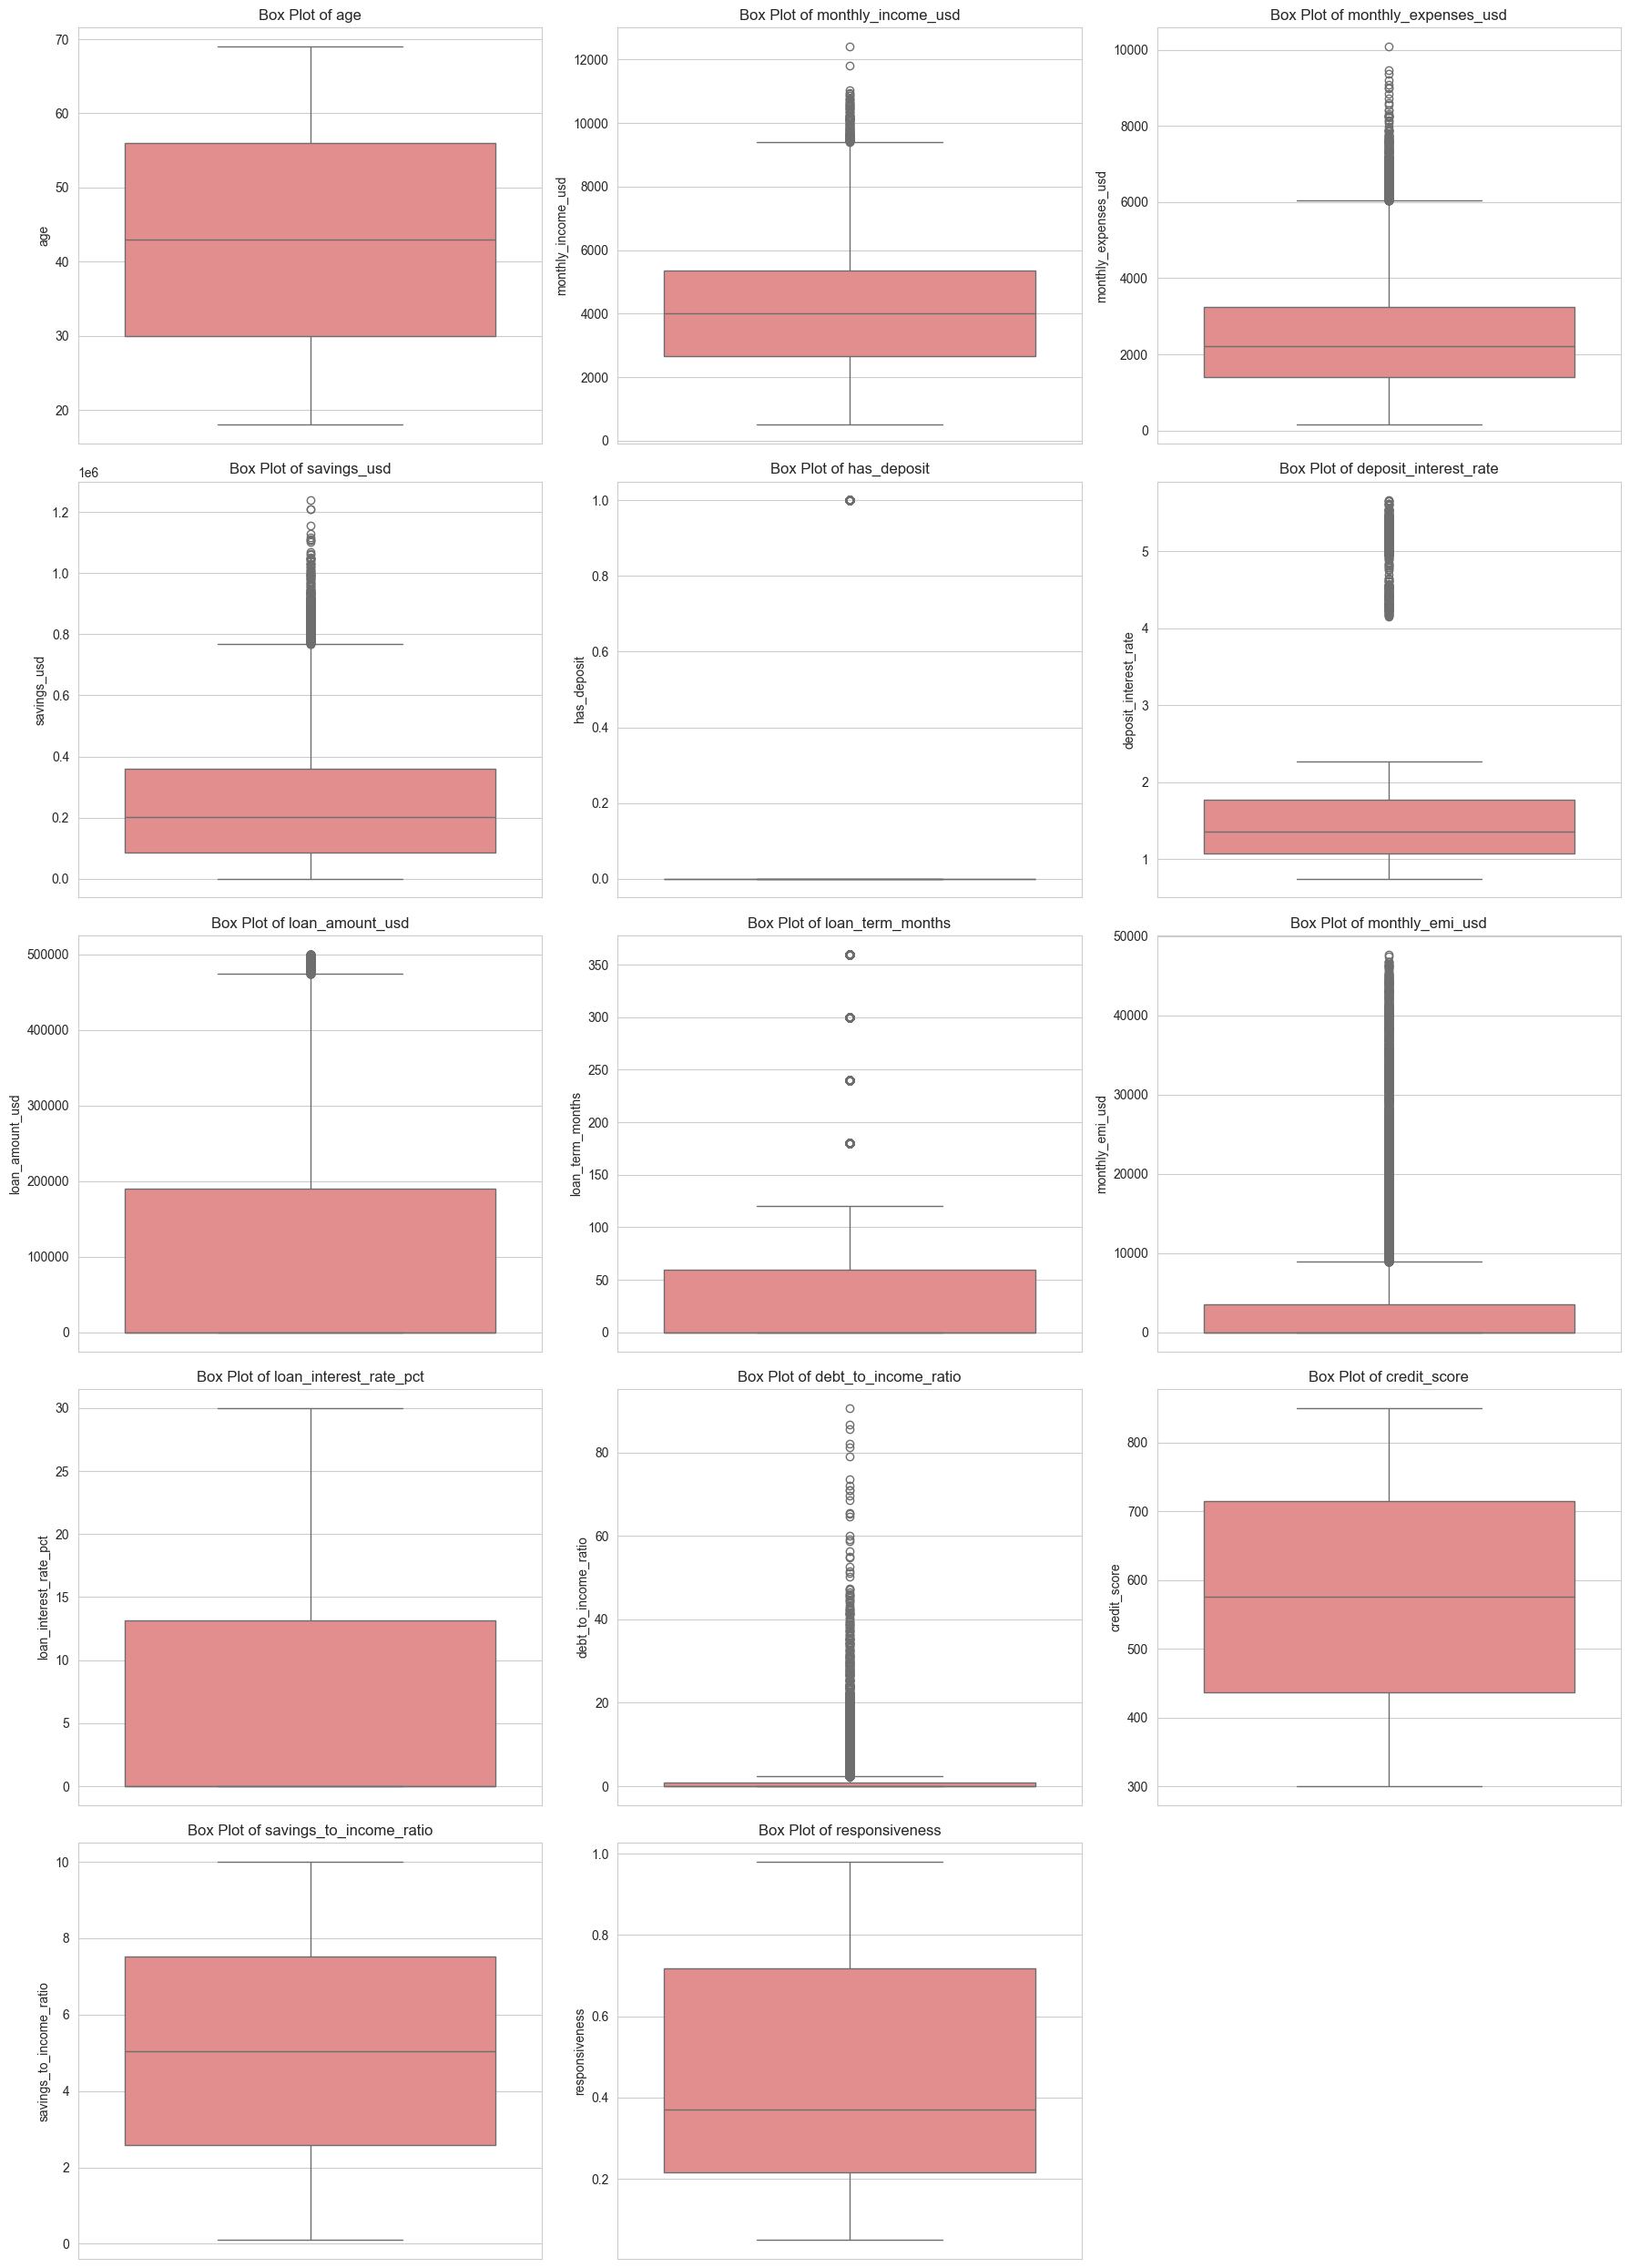

/var/folders/8f/6znkn6r55qj5dgt5vxxlvwjm0000gn/T/ipykernel_75949/2533755.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


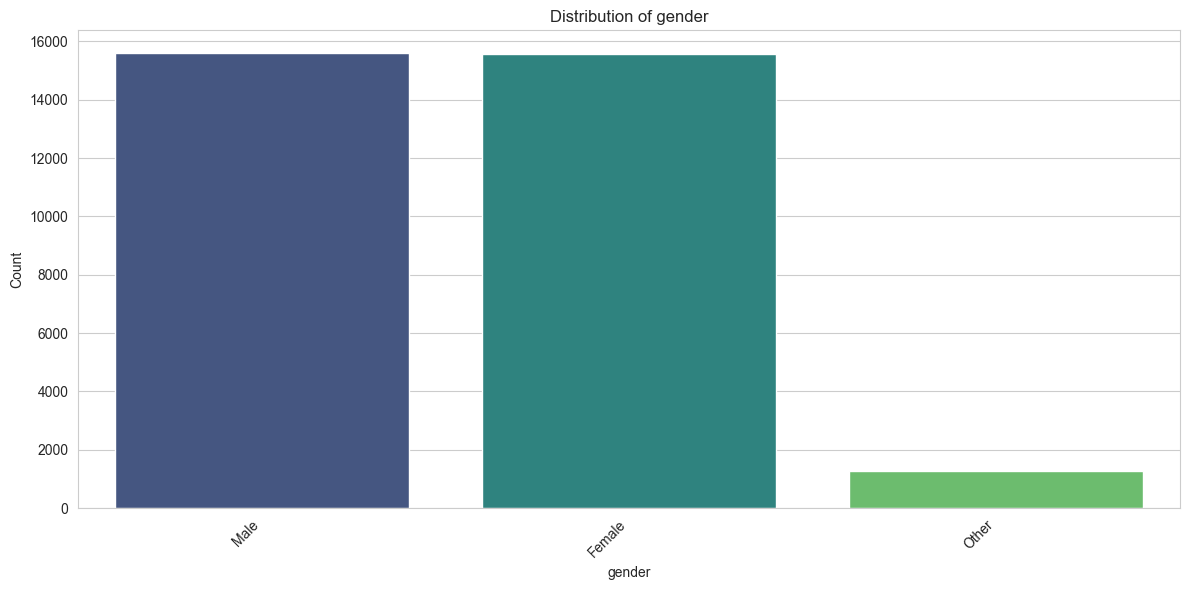

/var/folders/8f/6znkn6r55qj5dgt5vxxlvwjm0000gn/T/ipykernel_75949/2533755.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


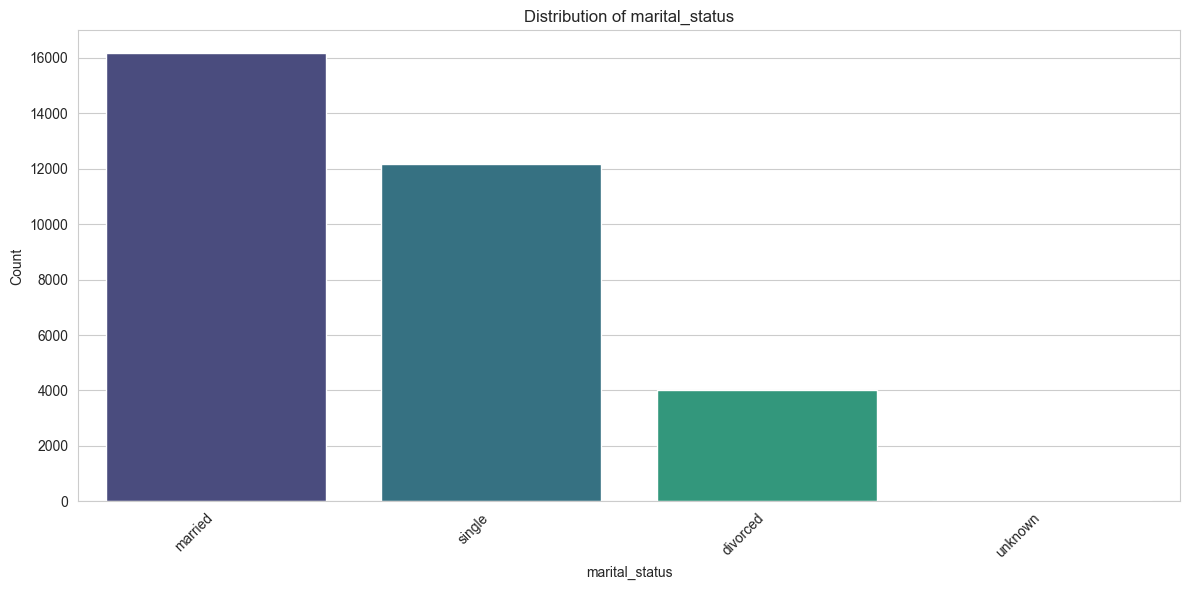

/var/folders/8f/6znkn6r55qj5dgt5vxxlvwjm0000gn/T/ipykernel_75949/2533755.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


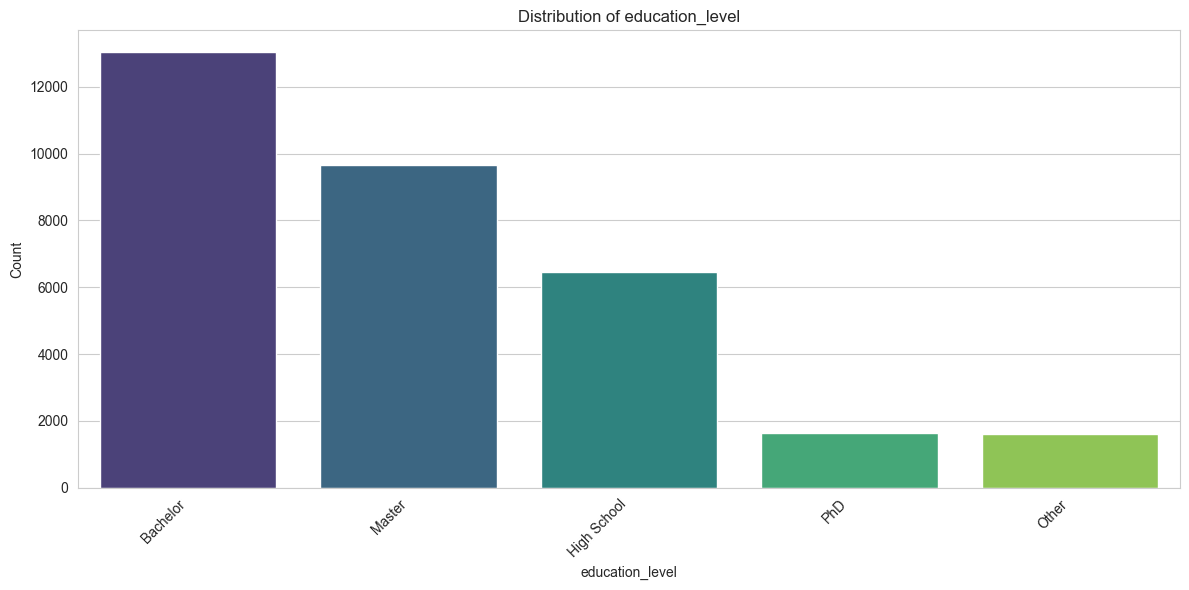

/var/folders/8f/6znkn6r55qj5dgt5vxxlvwjm0000gn/T/ipykernel_75949/2533755.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


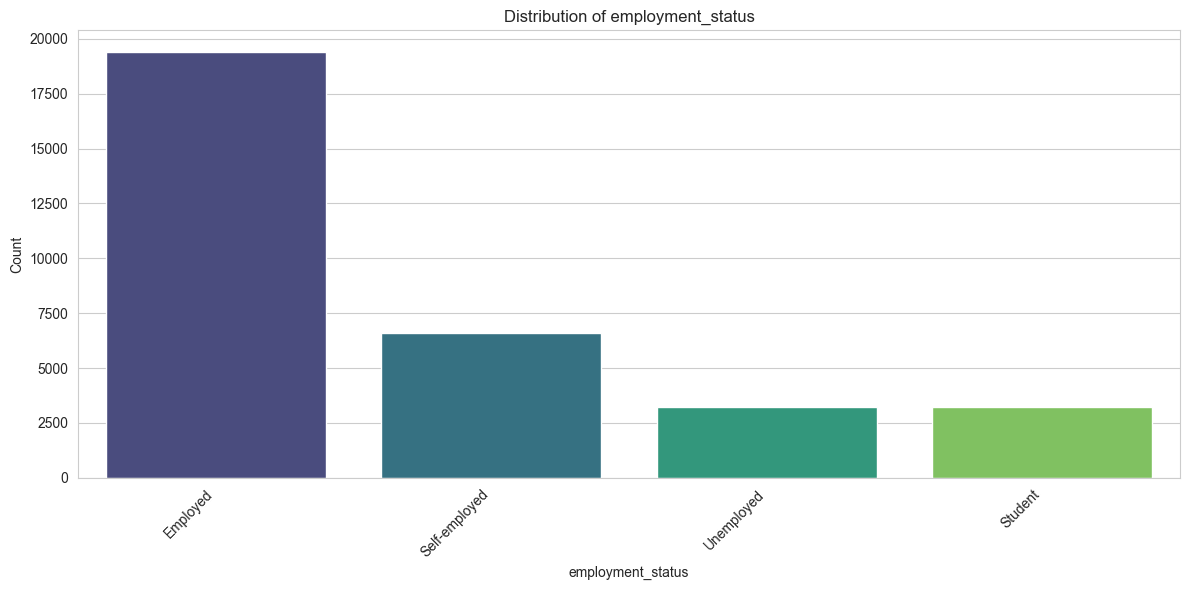

/var/folders/8f/6znkn6r55qj5dgt5vxxlvwjm0000gn/T/ipykernel_75949/2533755.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


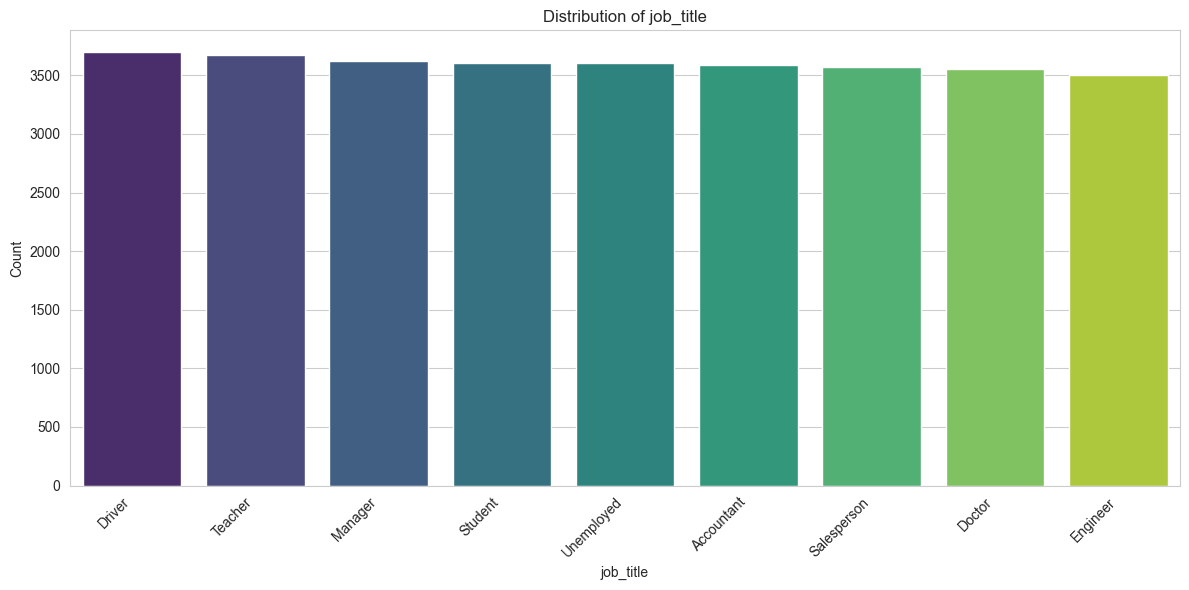

/var/folders/8f/6znkn6r55qj5dgt5vxxlvwjm0000gn/T/ipykernel_75949/2533755.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


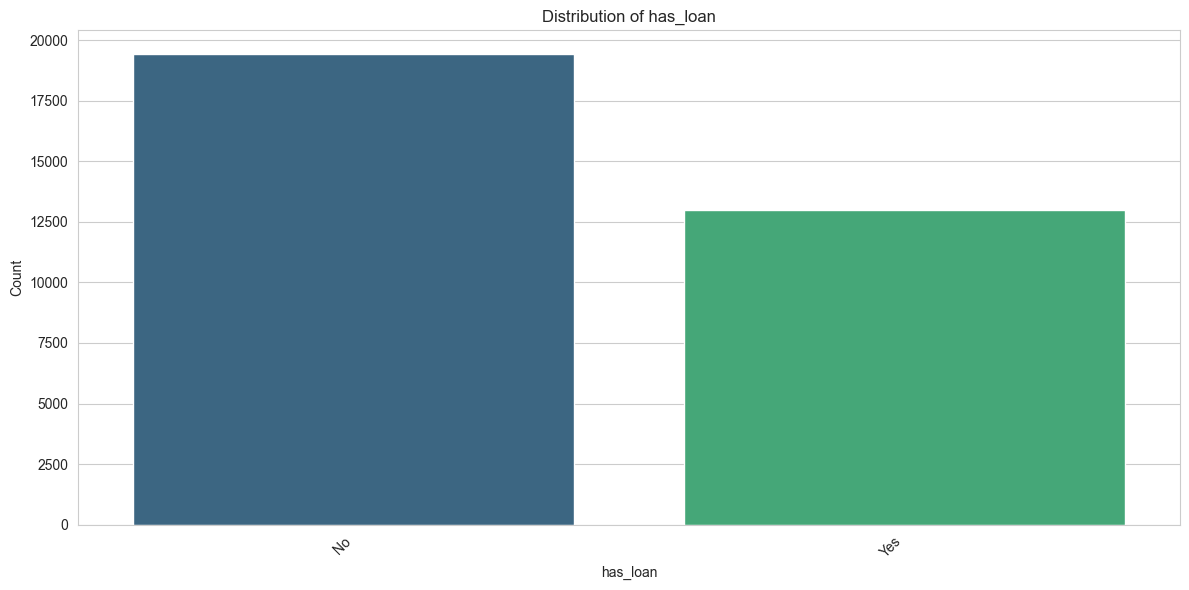

/var/folders/8f/6znkn6r55qj5dgt5vxxlvwjm0000gn/T/ipykernel_75949/2533755.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


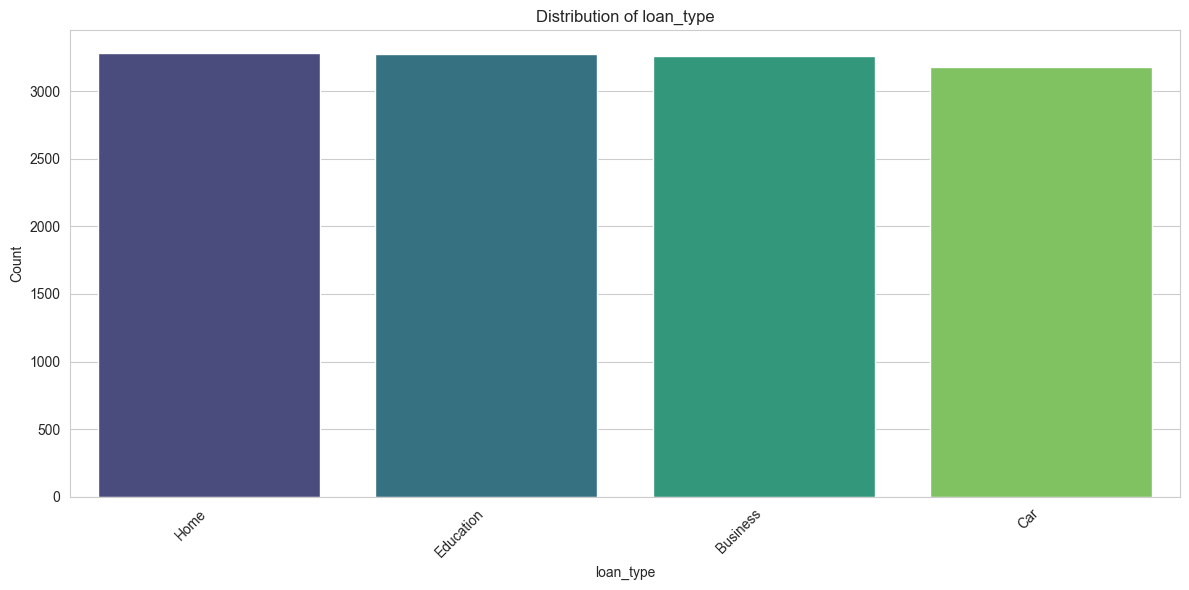

/var/folders/8f/6znkn6r55qj5dgt5vxxlvwjm0000gn/T/ipykernel_75949/2533755.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


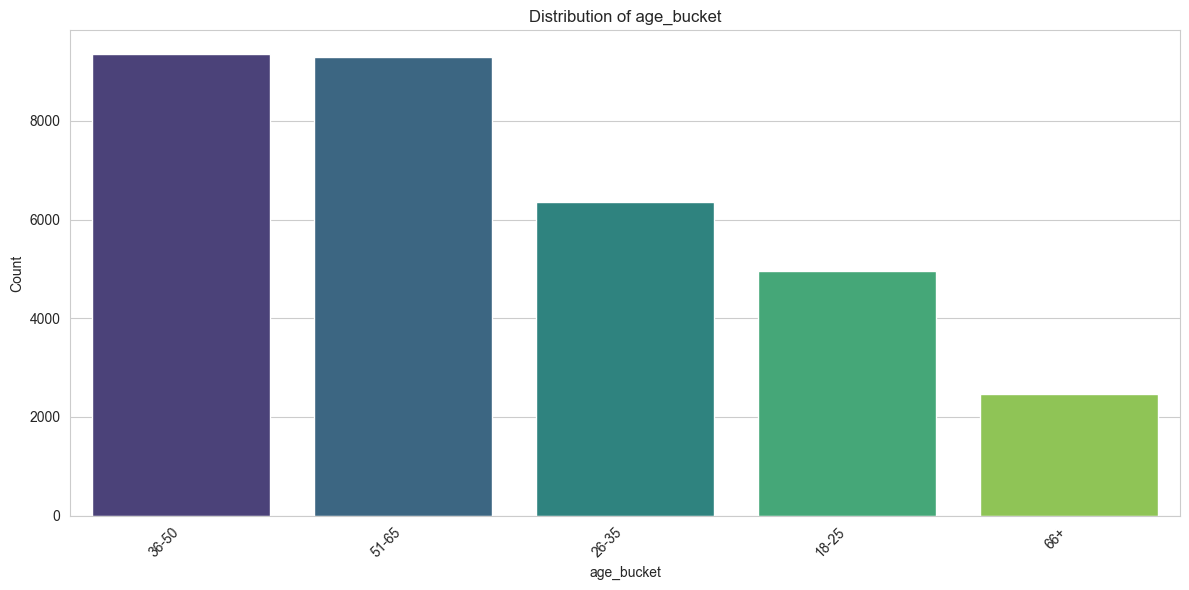

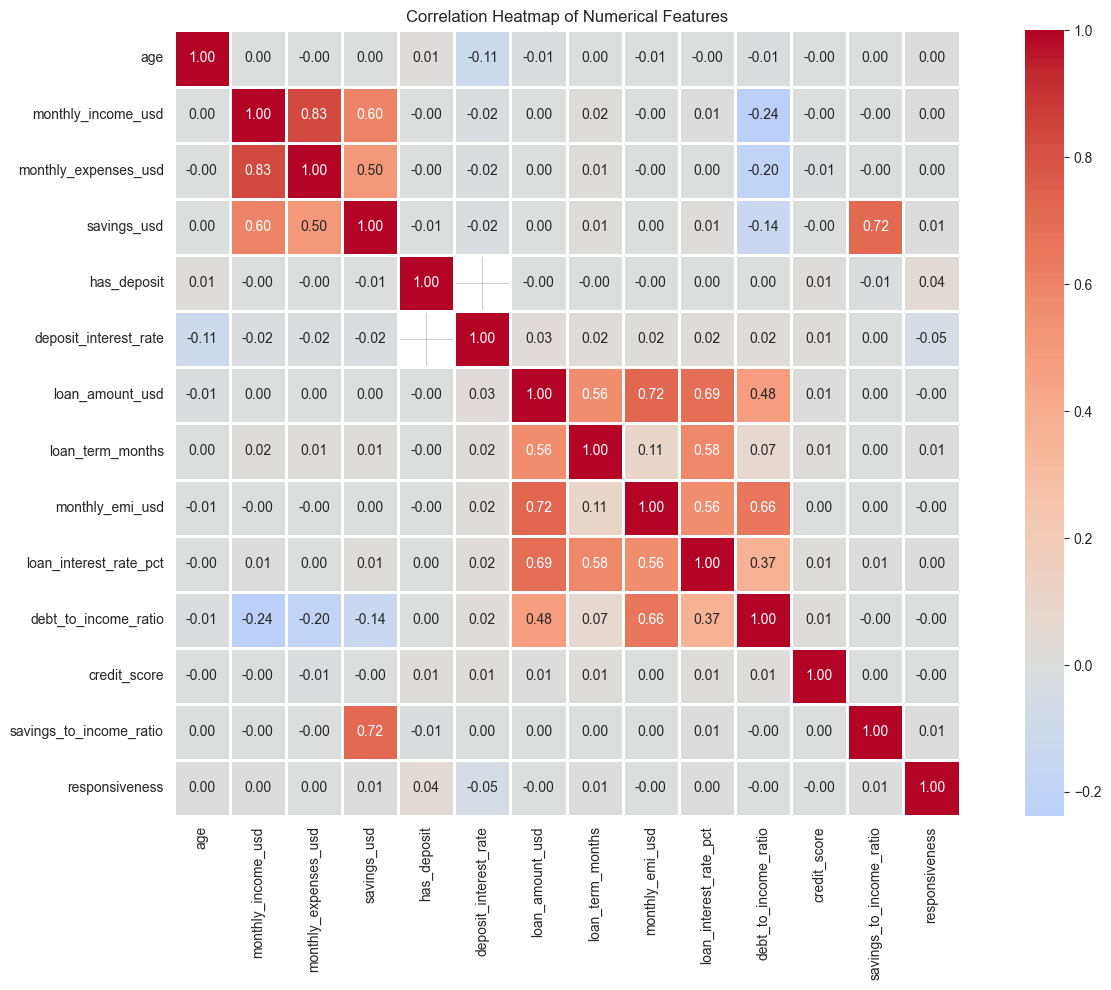

Too many numerical columns (14) for pairplot. Consider selecting key features.

STATISTICAL SUMMARY

                           count           mean            std     min  \
age                      32424.0      43.415865      14.978246   18.00   
monthly_income_usd       32424.0    4027.863185    1916.773353  500.00   
monthly_expenses_usd     32424.0    2419.444709    1388.893084  150.01   
savings_usd              32424.0  243752.036091  191577.189517  635.96   
has_deposit              32424.0       0.147977       0.355082    0.00   
deposit_interest_rate     4798.0       1.978281       1.490076    0.75   
loan_amount_usd          32424.0  100114.735992  152536.588635    0.00   
loan_term_months         32424.0      58.500000     104.865373    0.00   
monthly_emi_usd          32424.0    3092.992339    6478.939776    0.00   
loan_interest_rate_pct   32424.0       6.616332       9.472964    0.00   
debt_to_income_ratio     32424.0       1.194881       3.761964    0.00   
credit_scor

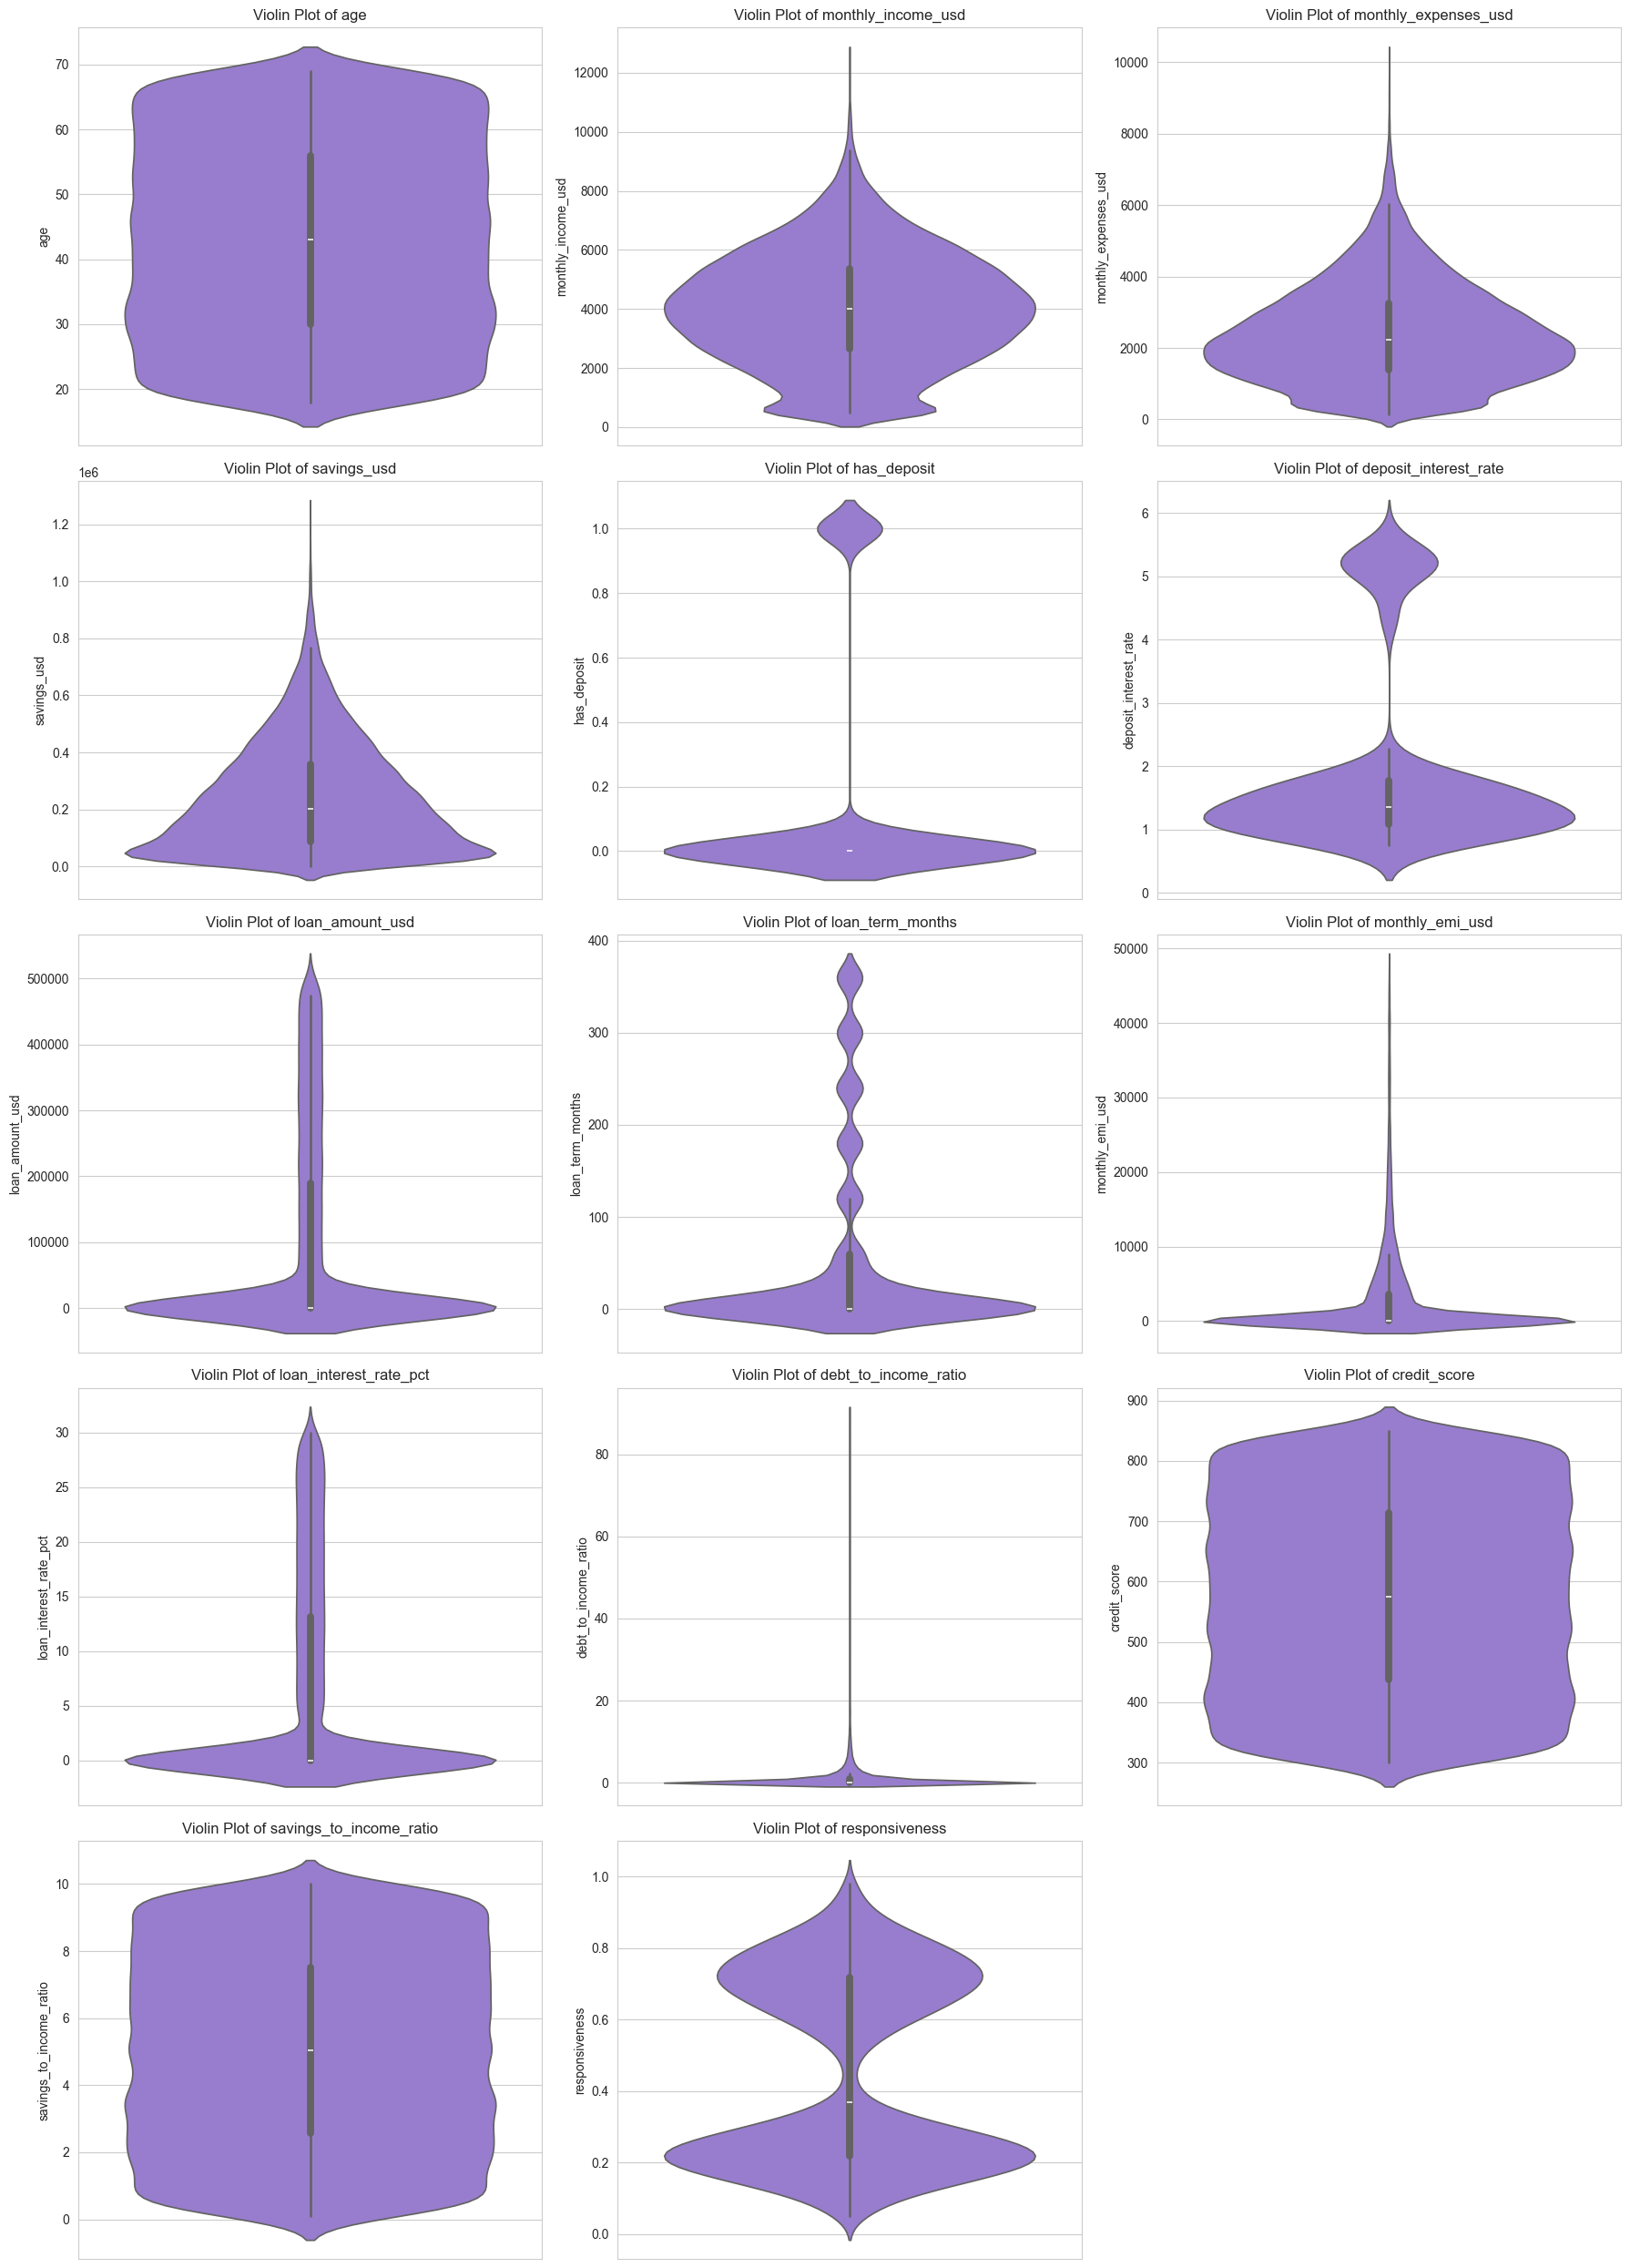

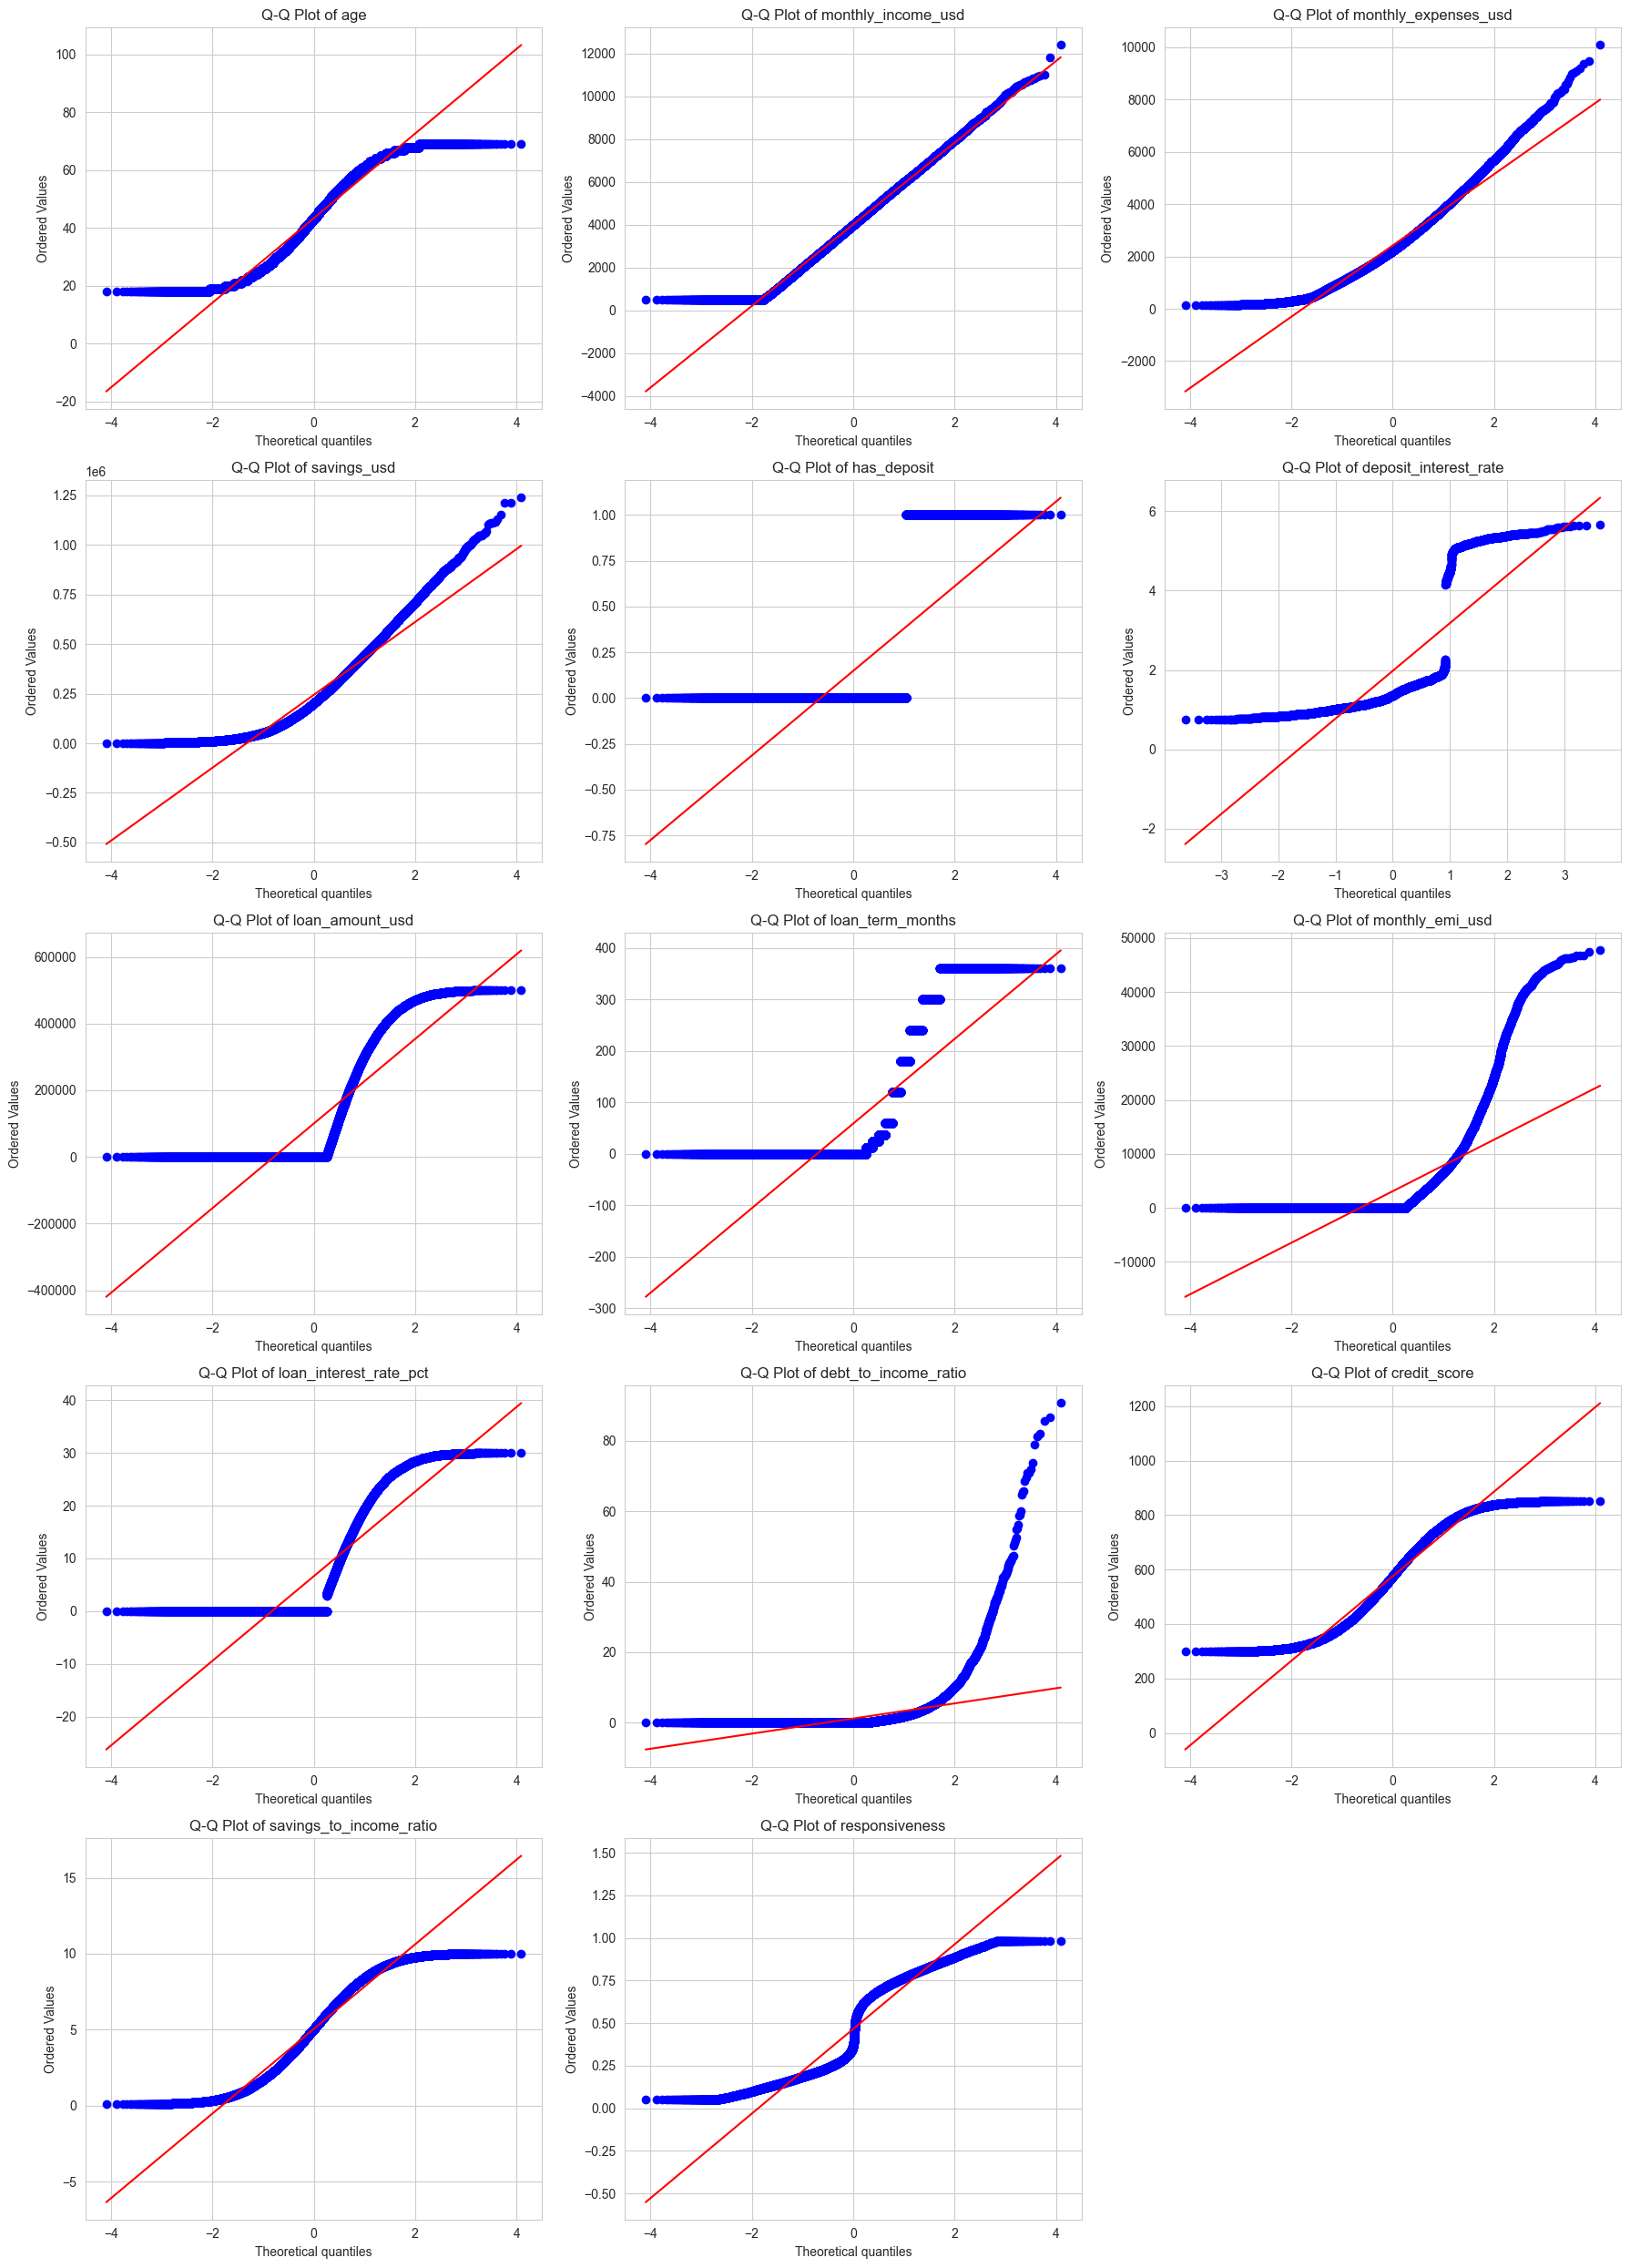

In [ ]:
# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

# 1. HISTOGRAMS AND KDE PLOTS FOR NUMERICAL FEATURES
fig, axes = plt.subplots(nrows=(len(numerical_cols)+2)//3, ncols=3, figsize=(18, 5*((len(numerical_cols)+2)//3)))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[idx], color='steelblue')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    
# Remove extra subplots
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# 2. BOX PLOTS FOR NUMERICAL FEATURES (detect outliers)
fig, axes = plt.subplots(nrows=(len(numerical_cols)+2)//3, ncols=3, figsize=(18, 5*((len(numerical_cols)+2)//3)))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    sns.boxplot(data=df, y=col, ax=axes[idx], color='lightcoral')
    axes[idx].set_title(f'Box Plot of {col}')
    
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# 3. BAR PLOTS FOR CATEGORICAL FEATURES
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    value_counts = df[col].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 4. CORRELATION HEATMAP
plt.figure(figsize=(14, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

# 5. PAIRPLOT (for relationships between variables)
# Note: Use a subset if you have many features
if len(numerical_cols) <= 10:
    sns.pairplot(df[numerical_cols], diag_kind='kde', plot_kws={'alpha':0.6})
    plt.suptitle('Pairplot of Numerical Features', y=1.02)
    plt.show()
else:
    print(f"Too many numerical columns ({len(numerical_cols)}) for pairplot. Consider selecting key features.")

# 6. STATISTICAL SUMMARY
print("\n" + "="*50)
print("STATISTICAL SUMMARY")
print("="*50 + "\n")
print(df.describe().T)

# 7. SKEWNESS AND KURTOSIS
print("\n" + "="*50)
print("SKEWNESS AND KURTOSIS")
print("="*50 + "\n")
skew_kurt = pd.DataFrame({
    'Skewness': df[numerical_cols].skew(),
    'Kurtosis': df[numerical_cols].kurtosis()
})
print(skew_kurt)

# 8. OUTLIER DETECTION SUMMARY
print("\n" + "="*50)
print("OUTLIER DETECTION (IQR Method)")
print("="*50 + "\n")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

# 10. QQ PLOTS (check normality)
fig, axes = plt.subplots(nrows=(len(numerical_cols)+2)//3, ncols=3, figsize=(18, 5*((len(numerical_cols)+2)//3)))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    stats.probplot(df[col].dropna(), dist="norm", plot=axes[idx])
    axes[idx].set_title(f'Q-Q Plot of {col}')
    
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

Original dataset size: 32424
Filtered dataset size (zeros removed): 12985
Rows removed: 19439


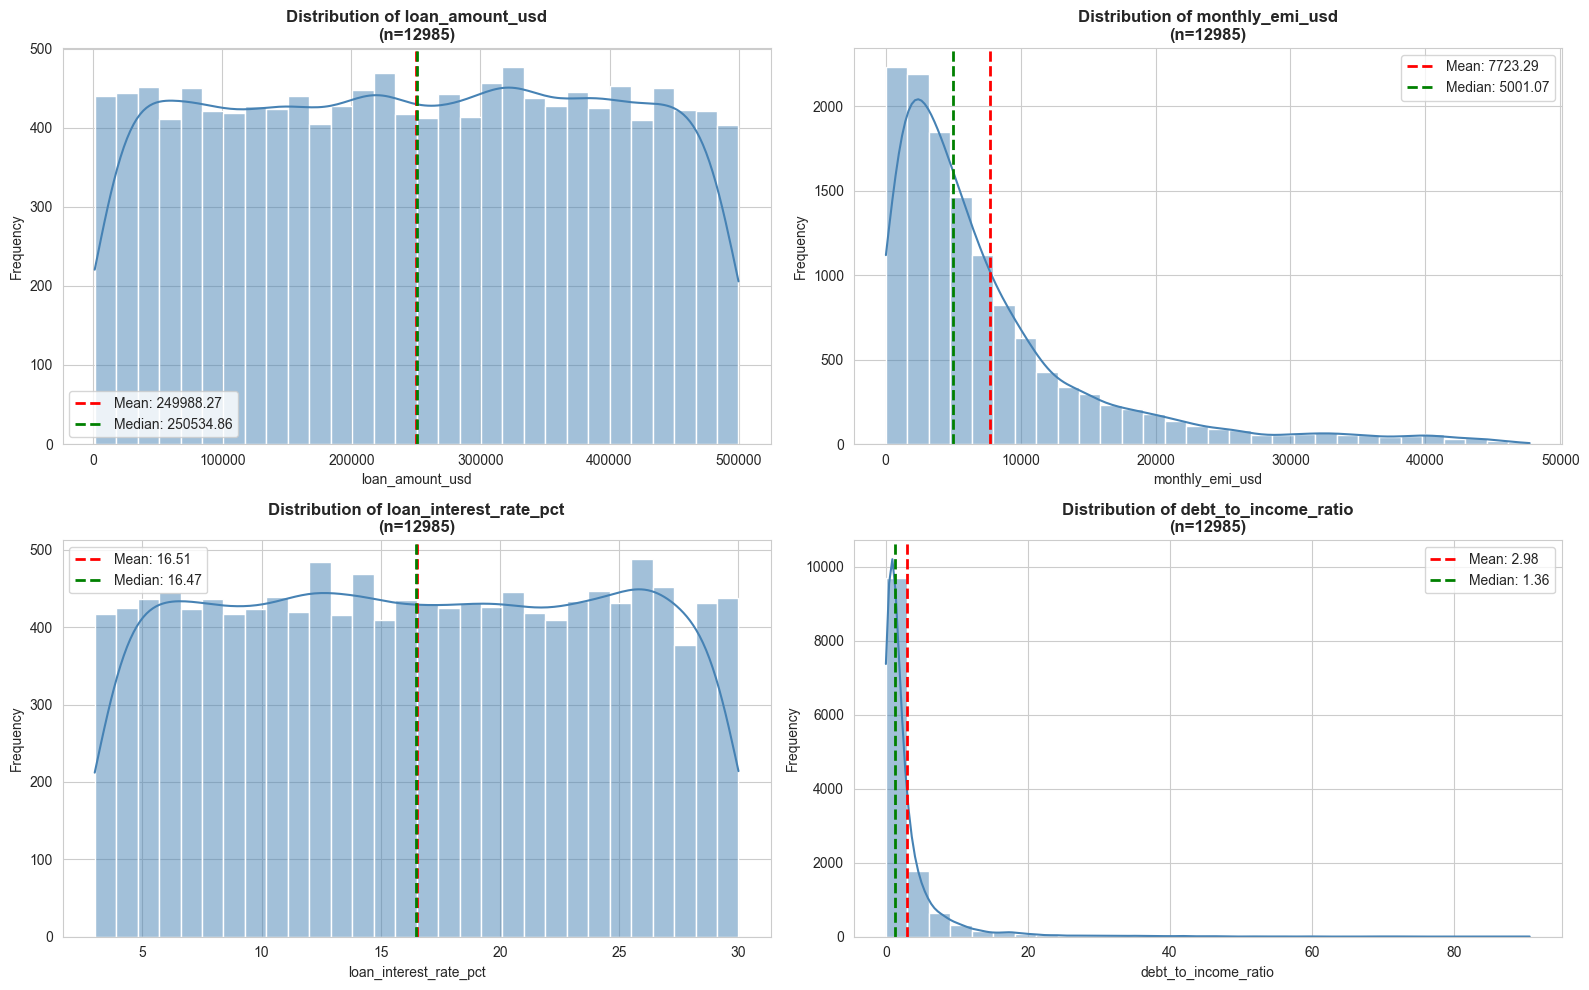

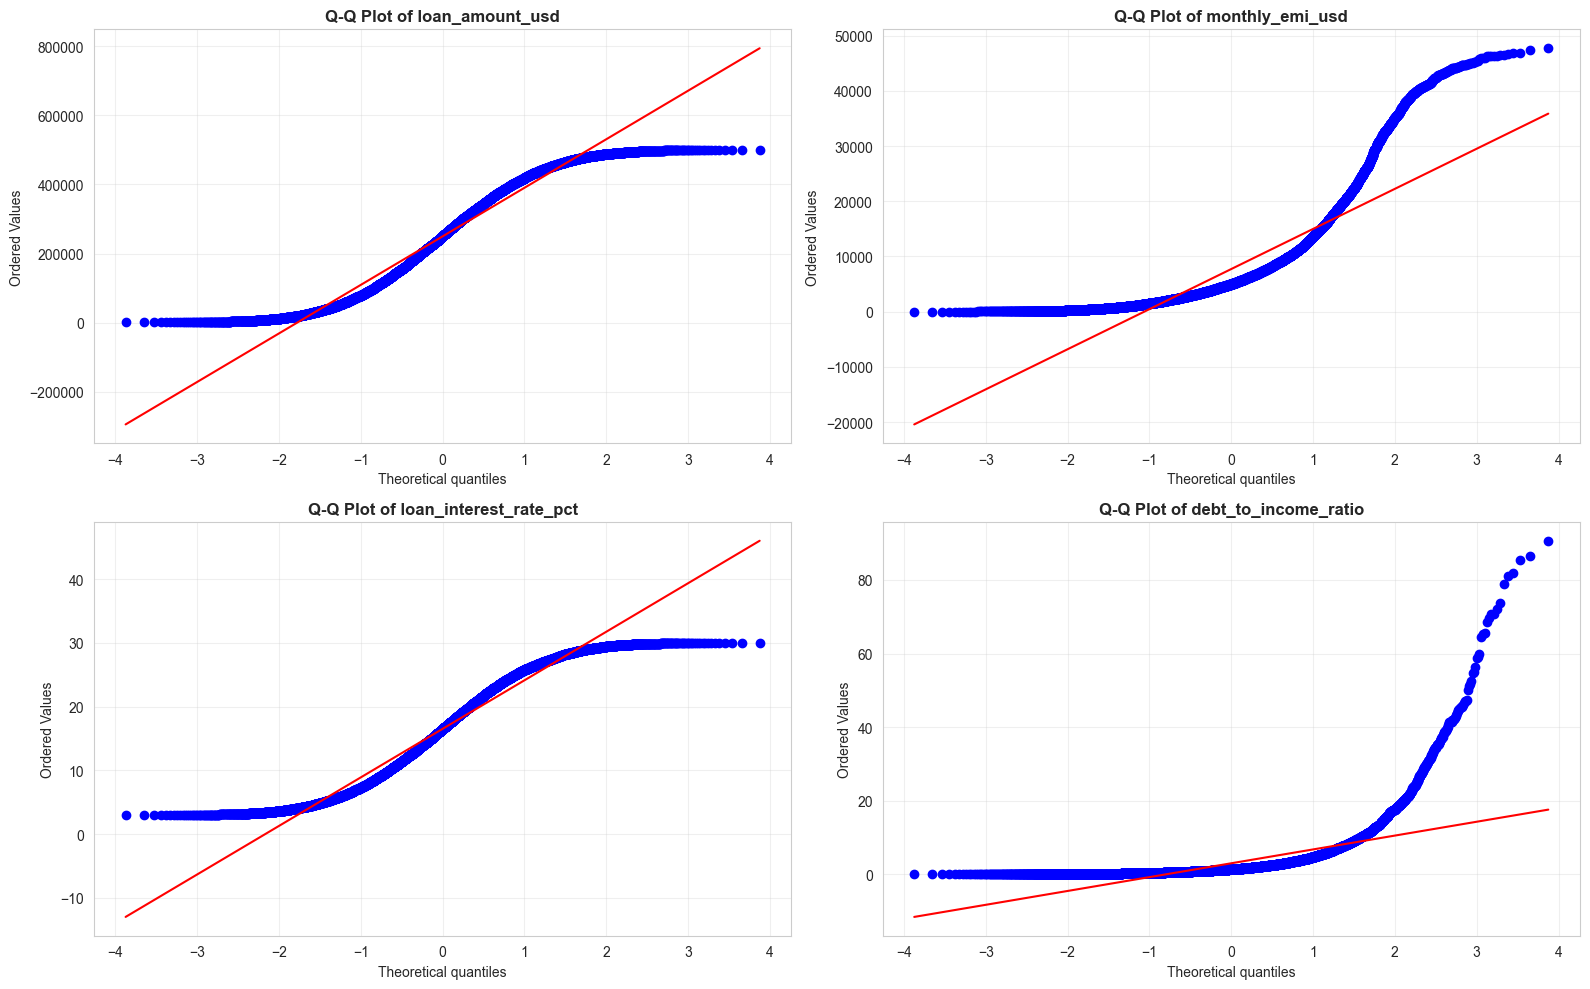


STATISTICAL SUMMARY (Zeros Excluded)
                          count           mean            std      min  \
loan_amount_usd         12985.0  249988.270885  143641.499010  1011.14   
monthly_emi_usd         12985.0    7723.294756    8310.122456    17.98   
loan_interest_rate_pct  12985.0      16.514907       7.782820     3.00   
debt_to_income_ratio    12985.0       2.983660       5.477508     0.01   

                              25%        50%        75%        max  skewness  \
loan_amount_usd         125697.82  250534.86  374101.37  499954.75 -0.009630   
monthly_emi_usd           2322.91    5001.07    9709.17   47723.84  2.121440   
loan_interest_rate_pct       9.81      16.47      23.32      30.00 -0.000350   
debt_to_income_ratio         0.58       1.36       3.07      90.67  6.055983   

                         kurtosis  
loan_amount_usd         -1.195186  
monthly_emi_usd          4.881220  
loan_interest_rate_pct  -1.200892  
debt_to_income_ratio    55.635607  


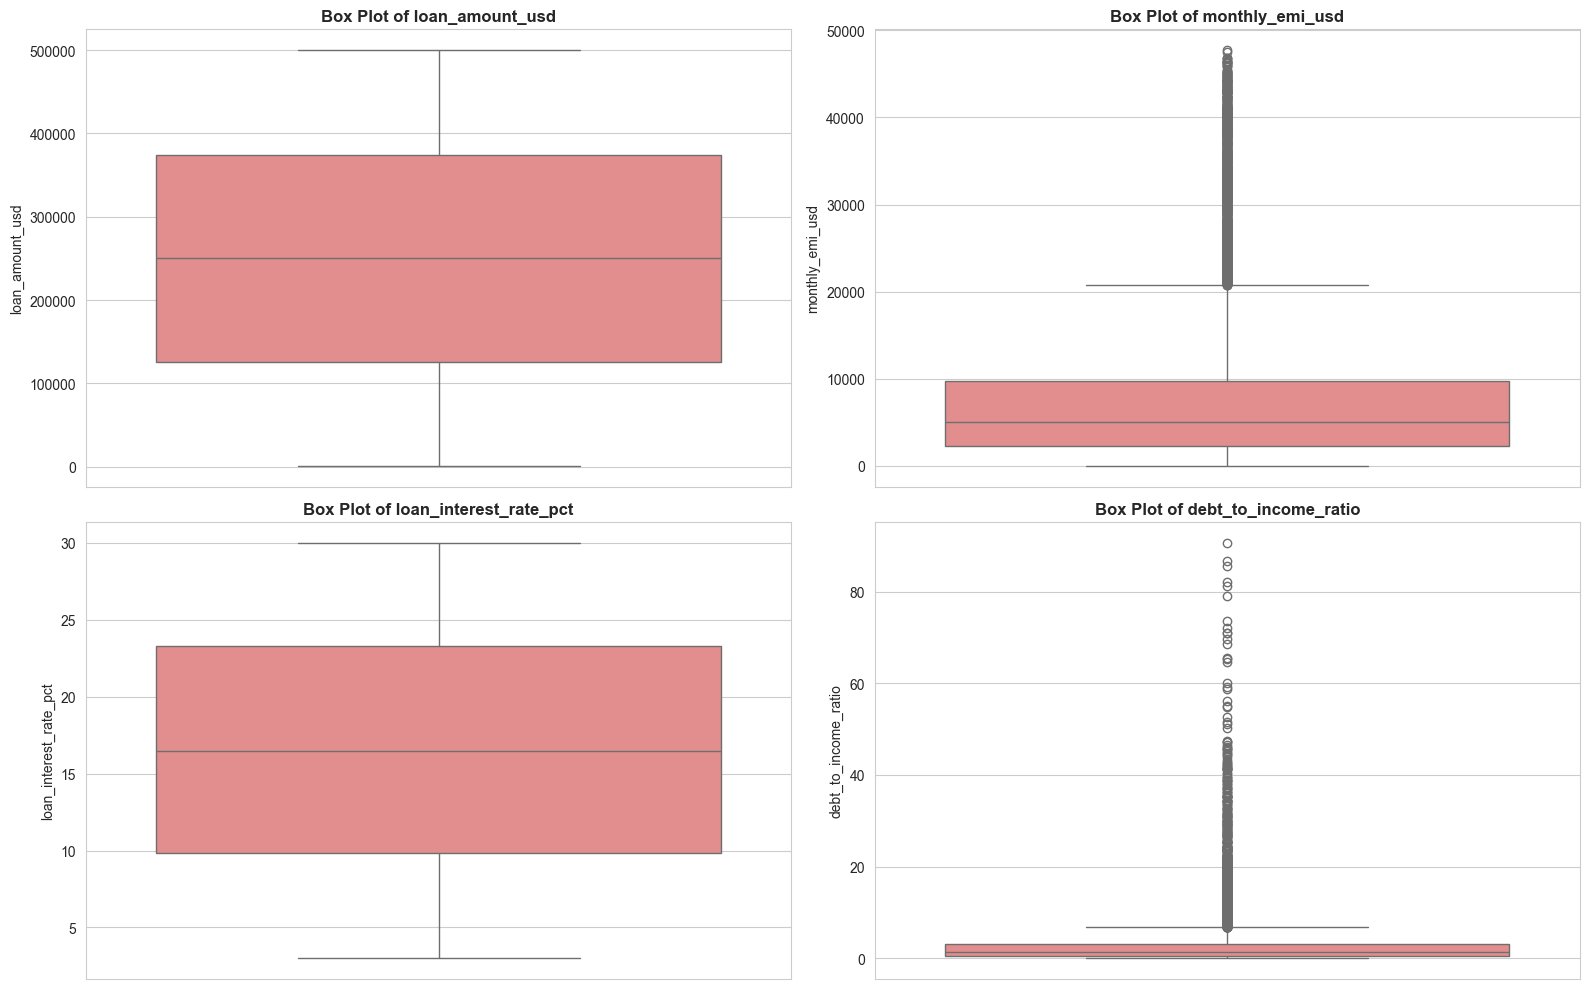

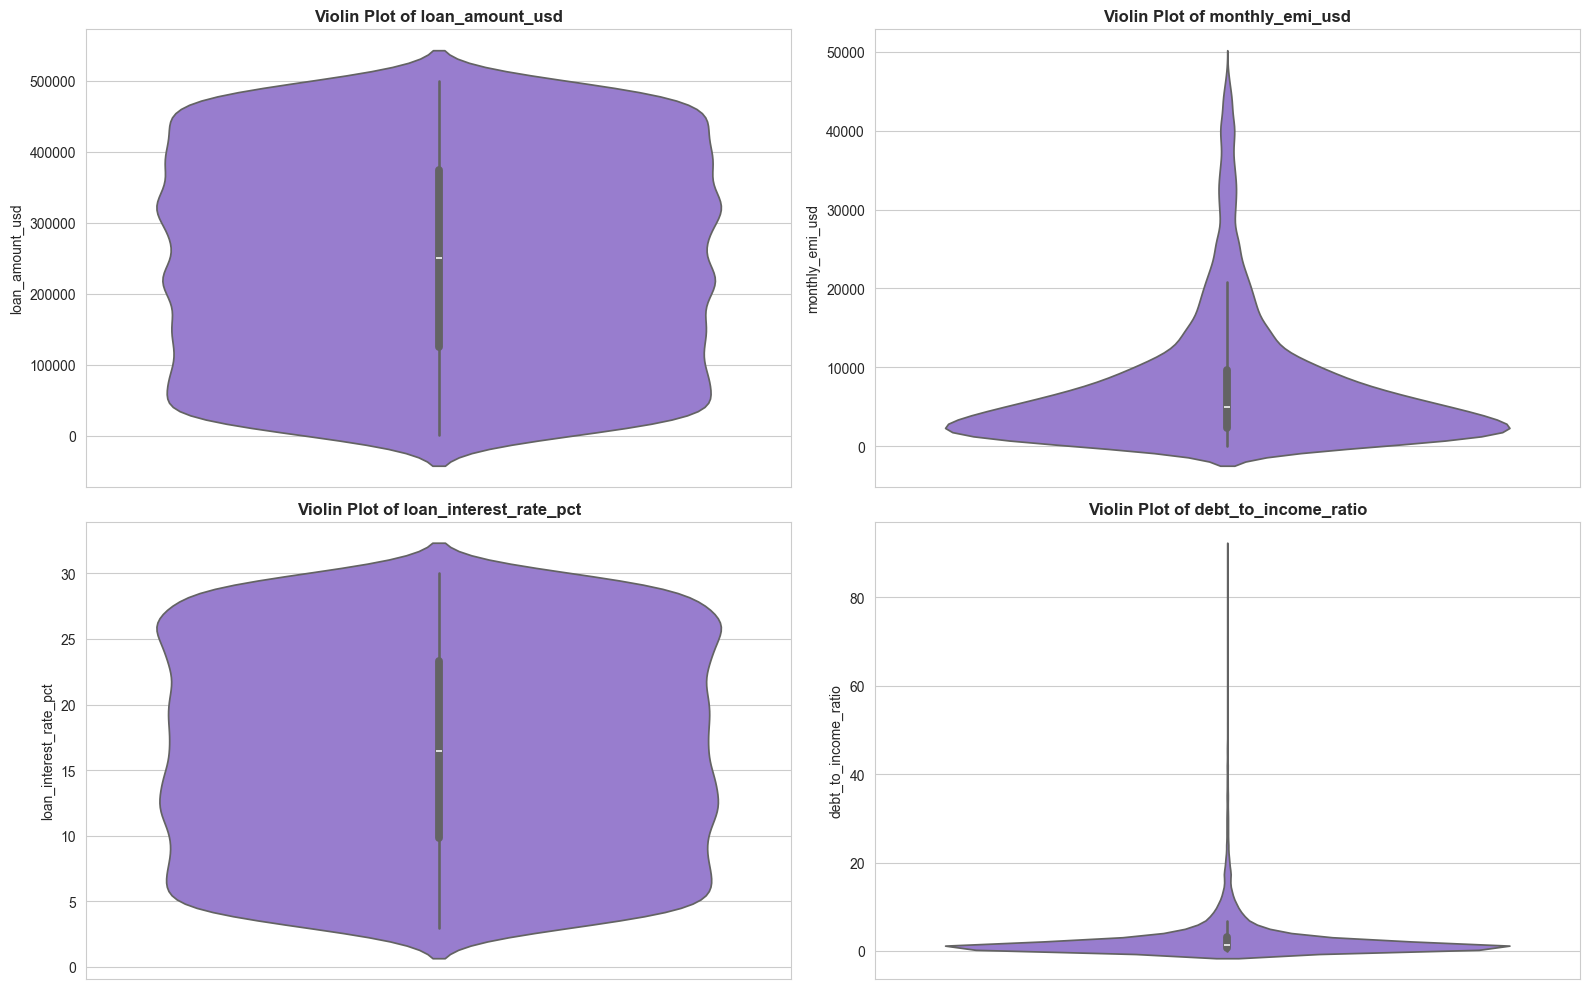

In [15]:
# Filter out zeros and plot specific financial features
features_to_plot = ['loan_amount_usd', 'monthly_emi_usd', 'loan_interest_rate_pct', 'debt_to_income_ratio']

# Create filtered dataframe (excluding zeros)
df_filtered = df.copy()
for col in features_to_plot:
    if col in df_filtered.columns:
        df_filtered = df_filtered[df_filtered[col] != 0]

print(f"Original dataset size: {len(df)}")
print(f"Filtered dataset size (zeros removed): {len(df_filtered)}")
print(f"Rows removed: {len(df) - len(df_filtered)}")

# 1. HISTOGRAMS WITH KDE
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axes = axes.flatten()

for idx, col in enumerate(features_to_plot):
    if col in df_filtered.columns:
        sns.histplot(data=df_filtered, x=col, kde=True, ax=axes[idx], color='steelblue', bins=30)
        axes[idx].set_title(f'Distribution of {col}\n(n={len(df_filtered)})', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col, fontsize=10)
        axes[idx].set_ylabel('Frequency', fontsize=10)
        
        # Add mean and median lines
        mean_val = df_filtered[col].mean()
        median_val = df_filtered[col].median()
        axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
        axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
        axes[idx].legend()

plt.tight_layout()
plt.show()

# 2. Q-Q PLOTS (Normality Test)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axes = axes.flatten()

for idx, col in enumerate(features_to_plot):
    if col in df_filtered.columns:
        stats.probplot(df_filtered[col].dropna(), dist="norm", plot=axes[idx])
        axes[idx].set_title(f'Q-Q Plot of {col}', fontsize=12, fontweight='bold')
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. STATISTICAL SUMMARY
print("\n" + "="*70)
print("STATISTICAL SUMMARY (Zeros Excluded)")
print("="*70)
summary_stats = df_filtered[features_to_plot].describe().T
summary_stats['skewness'] = df_filtered[features_to_plot].skew()
summary_stats['kurtosis'] = df_filtered[features_to_plot].kurtosis()
print(summary_stats)

# 4. BOX PLOTS FOR OUTLIER DETECTION
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axes = axes.flatten()

for idx, col in enumerate(features_to_plot):
    if col in df_filtered.columns:
        sns.boxplot(data=df_filtered, y=col, ax=axes[idx], color='lightcoral')
        axes[idx].set_title(f'Box Plot of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()

# 5. VIOLIN PLOTS (Distribution + Box Plot)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axes = axes.flatten()

for idx, col in enumerate(features_to_plot):
    if col in df_filtered.columns:
        sns.violinplot(data=df_filtered, y=col, ax=axes[idx], color='mediumpurple')
        axes[idx].set_title(f'Violin Plot of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()

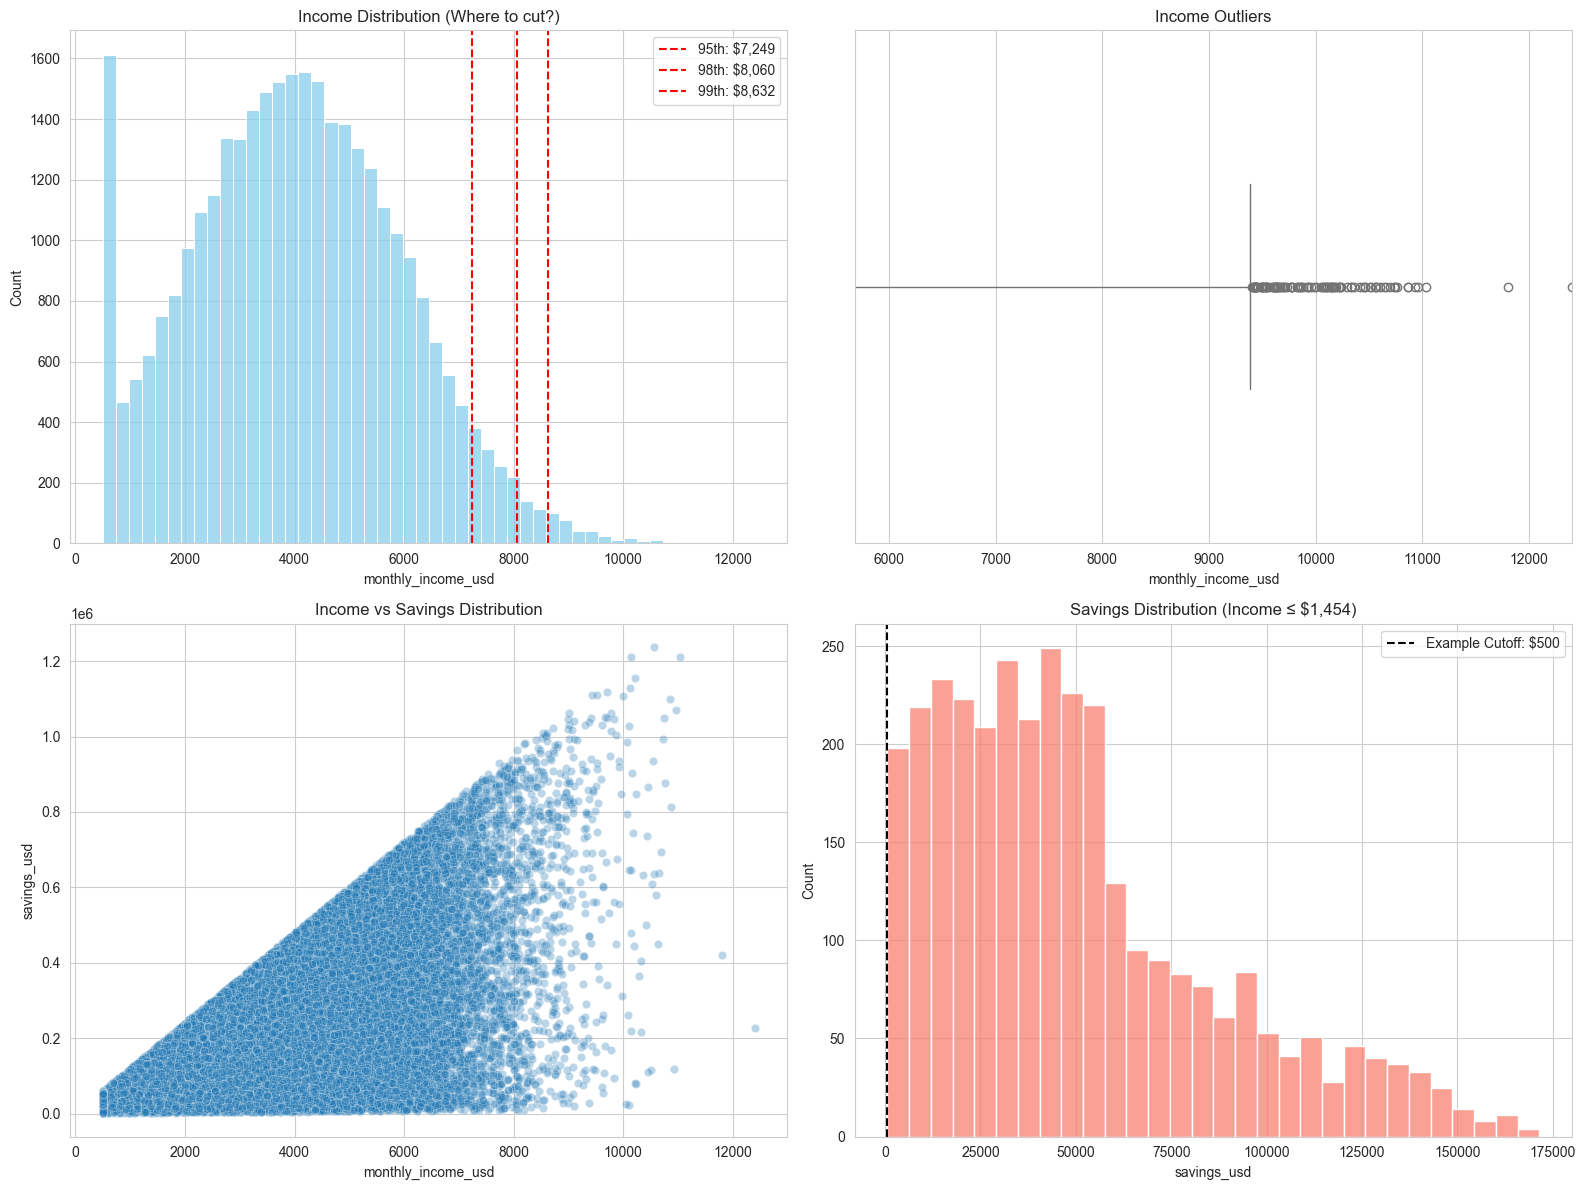

--- Income Statistics ---
Minimum Income: $500.00
Maximum Income: $12,404.05
Mean Income: $4,027.86
Median Income: $3,997.74

--- Income Percentiles ---
0.050     741.19400
0.100    1453.54800
0.900    6520.58200
0.950    7249.16800
0.980    8060.07540
0.990    8631.93050
0.995    9077.50015
Name: monthly_income_usd, dtype: float64

--- Zero/Low Income Analysis ---
No users with exactly $0 income found in dataset

Bottom 5% Income Users: 3243
Income threshold: $1,453.55
Among them, 0 have < $500 savings (0.0%)


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Config
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# -------------------------------------------------------
# 1. INCOME CUT (Top Row)
# -------------------------------------------------------
# Histogram with Percentile Lines
sns.histplot(df['monthly_income_usd'], bins=50, ax=axes[0,0], color='skyblue')
quantiles = [0.95, 0.98, 0.99]
for q in quantiles:
    val = df['monthly_income_usd'].quantile(q)
    axes[0,0].axvline(val, color='red', linestyle='--', label=f'{int(q*100)}th: ${val:,.0f}')
axes[0,0].set_title('Income Distribution (Where to cut?)')
axes[0,0].legend()

# Boxplot to see extreme outliers
sns.boxplot(x=df['monthly_income_usd'], ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Income Outliers')
# Limit view to top 20% to see the tail clearly
limit_low = df['monthly_income_usd'].quantile(0.8)
axes[0,1].set_xlim(limit_low, df['monthly_income_usd'].max())

# -------------------------------------------------------
# 2. LOW INCOME / SAVINGS ANALYSIS (Bottom Row)
# -------------------------------------------------------
# Scatter: Income vs Savings
sns.scatterplot(x='monthly_income_usd', y='savings_usd', data=df, alpha=0.3, ax=axes[1,0])
axes[1,0].set_title('Income vs Savings Distribution')

# Find minimum income
min_income = df['monthly_income_usd'].min()
low_income_threshold = df['monthly_income_usd'].quantile(0.1)  # Bottom 5%

# Histogram of Savings for Low-Income People
low_income = df[df['monthly_income_usd'] <= low_income_threshold]
if len(low_income) > 0:
    sns.histplot(low_income['savings_usd'], bins=30, ax=axes[1,1], color='salmon')
    axes[1,1].axvline(500, color='black', linestyle='--', label='Example Cutoff: $500')
    axes[1,1].set_title(f'Savings Distribution (Income ≤ ${low_income_threshold:,.0f})')
    axes[1,1].legend()
else:
    axes[1,1].text(0.5, 0.5, 'No low-income users found', ha='center', va='center', transform=axes[1,1].transAxes)
    axes[1,1].set_title('Low Income Analysis')

plt.tight_layout()
plt.show()

# Print the exact numbers to help you decide
print("--- Income Statistics ---")
print(f"Minimum Income: ${df['monthly_income_usd'].min():,.2f}")
print(f"Maximum Income: ${df['monthly_income_usd'].max():,.2f}")
print(f"Mean Income: ${df['monthly_income_usd'].mean():,.2f}")
print(f"Median Income: ${df['monthly_income_usd'].median():,.2f}")

print("\n--- Income Percentiles ---")
print(df['monthly_income_usd'].quantile([0.05, 0.10, 0.90, 0.95, 0.98, 0.99, 0.995]))

print("\n--- Zero/Low Income Analysis ---")
zero_income = df[df['monthly_income_usd'] == 0]
count_total = len(zero_income)

if count_total > 0:
    count_drop = len(zero_income[zero_income['savings_usd'] < 500])
    print(f"Total Zero-Income Users: {count_total}")
    print(f"Dropping those with < $500 savings: {count_drop} users ({(count_drop/count_total)*100:.1f}%)")
else:
    print("No users with exactly $0 income found in dataset")
    
    # Analyze bottom 5% instead
    low_income_count = len(low_income)
    if low_income_count > 0:
        print(f"\nBottom 5% Income Users: {low_income_count}")
        print(f"Income threshold: ${low_income_threshold:,.2f}")
        low_savings = len(low_income[low_income['savings_usd'] < 500])
        print(f"Among them, {low_savings} have < $500 savings ({(low_savings/low_income_count)*100:.1f}%)")

Total users in dataset: 32424
Users with income < $741: 3243 (10.00%)

Savings Statistics for Low-Income Users (< $741):
count      3243.000000
mean      49721.202199
std       36297.952122
min         635.960000
25%       21648.675000
50%       42297.600000
75%       67345.945000
max      171447.430000
Name: savings_usd, dtype: float64


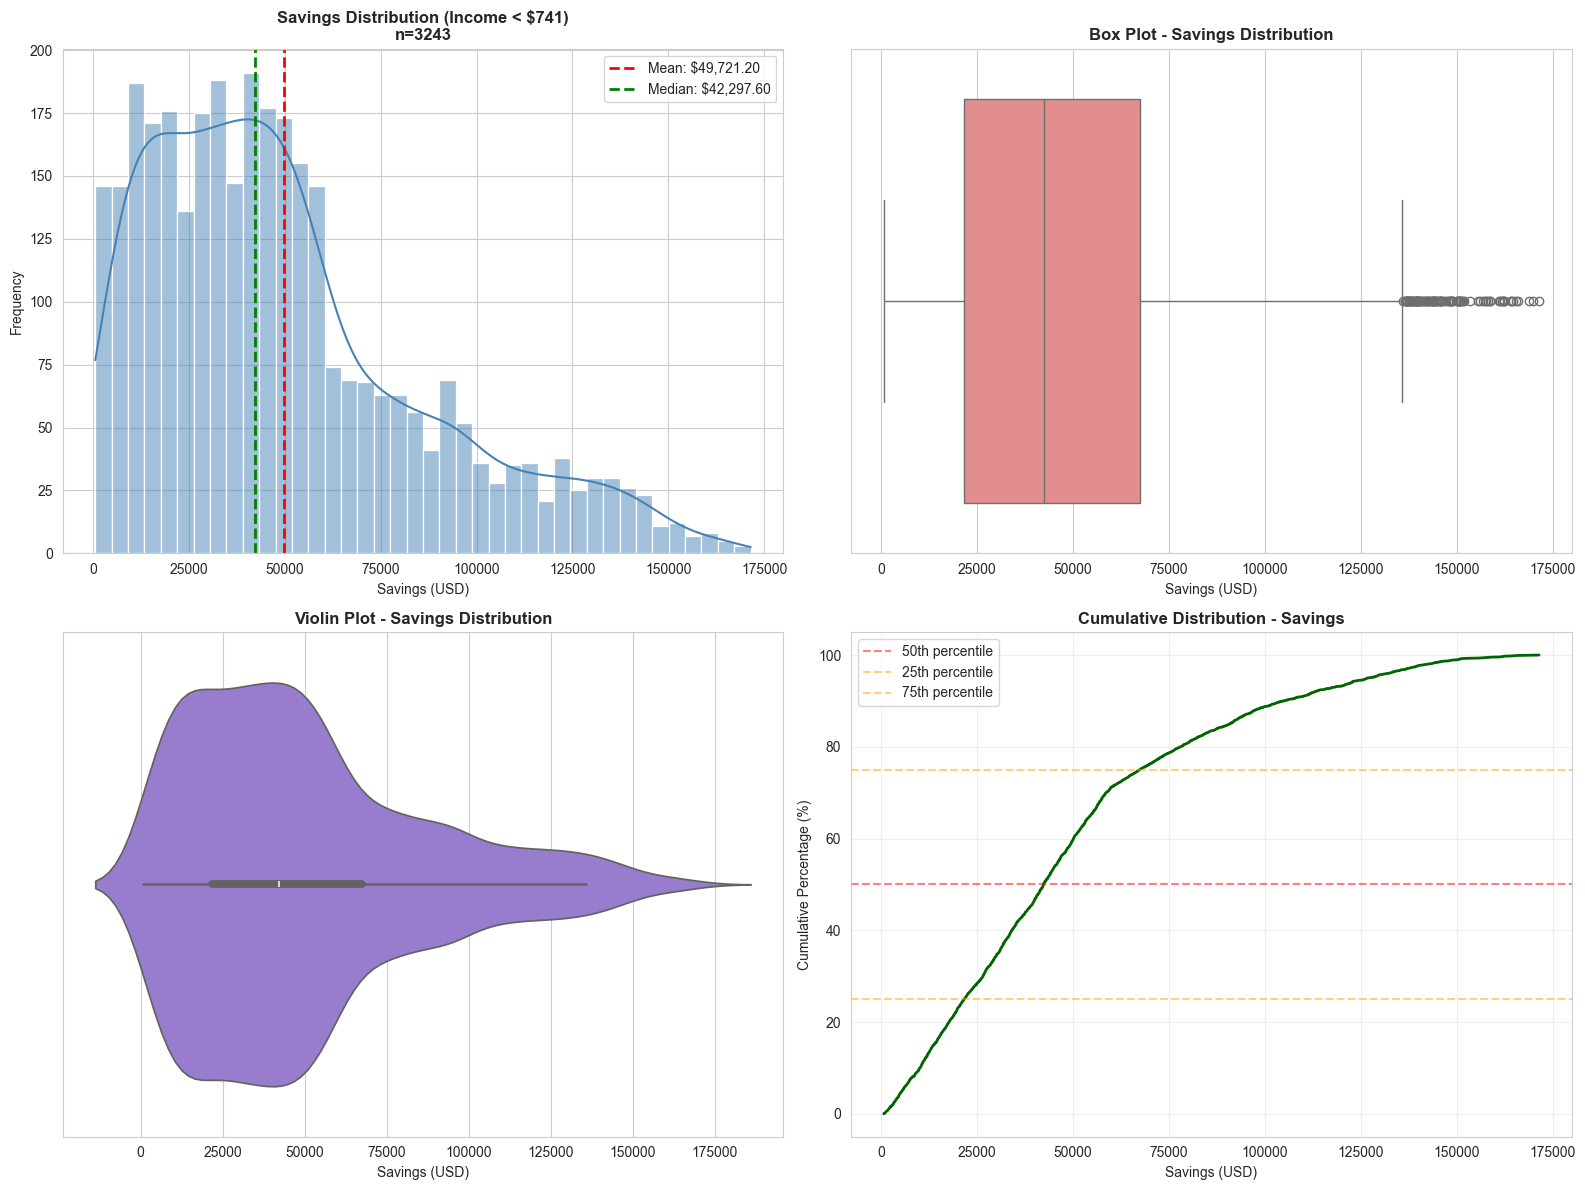


SAVINGS PERCENTILES
1th percentile: $1,918.96
5th percentile: $5,440.30
10th percentile: $10,021.07
25th percentile: $21,648.67
50th percentile: $42,297.60
75th percentile: $67,345.95
90th percentile: $104,957.40
95th percentile: $126,742.14
99th percentile: $150,250.38

SAVINGS RANGES
$0 - $100: 0 users (0.0%)
$100 - $500: 0 users (0.0%)
$500 - $1,000: 10 users (0.3%)
$1,000 - $5,000: 138 users (4.3%)
≥ $5,000: 3095 users (95.4%)


In [25]:
# Filter users with income < 741
low_income_users = df[df['monthly_income_usd'] < 1453.55]

print(f"Total users in dataset: {len(df)}")
print(f"Users with income < $741: {len(low_income_users)} ({len(low_income_users)/len(df)*100:.2f}%)")
print(f"\nSavings Statistics for Low-Income Users (< $741):")
print(low_income_users['savings_usd'].describe())

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Histogram with KDE
sns.histplot(data=low_income_users, x='savings_usd', kde=True, bins=40, 
             ax=axes[0,0], color='steelblue')
mean_savings = low_income_users['savings_usd'].mean()
median_savings = low_income_users['savings_usd'].median()
axes[0,0].axvline(mean_savings, color='red', linestyle='--', linewidth=2, 
                  label=f'Mean: ${mean_savings:,.2f}')
axes[0,0].axvline(median_savings, color='green', linestyle='--', linewidth=2, 
                  label=f'Median: ${median_savings:,.2f}')
axes[0,0].set_title(f'Savings Distribution (Income < $741)\nn={len(low_income_users)}', 
                    fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Savings (USD)', fontsize=10)
axes[0,0].set_ylabel('Frequency', fontsize=10)
axes[0,0].legend()

# 2. Box Plot
sns.boxplot(data=low_income_users, x='savings_usd', ax=axes[0,1], color='lightcoral')
axes[0,1].set_title('Box Plot - Savings Distribution', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Savings (USD)', fontsize=10)

# 3. Violin Plot
sns.violinplot(data=low_income_users, x='savings_usd', ax=axes[1,0], color='mediumpurple')
axes[1,0].set_title('Violin Plot - Savings Distribution', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Savings (USD)', fontsize=10)

# 4. Cumulative Distribution
savings_sorted = np.sort(low_income_users['savings_usd'])
cumulative = np.arange(1, len(savings_sorted) + 1) / len(savings_sorted) * 100
axes[1,1].plot(savings_sorted, cumulative, linewidth=2, color='darkgreen')
axes[1,1].axhline(50, color='red', linestyle='--', alpha=0.5, label='50th percentile')
axes[1,1].axhline(25, color='orange', linestyle='--', alpha=0.5, label='25th percentile')
axes[1,1].axhline(75, color='orange', linestyle='--', alpha=0.5, label='75th percentile')
axes[1,1].set_title('Cumulative Distribution - Savings', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Savings (USD)', fontsize=10)
axes[1,1].set_ylabel('Cumulative Percentage (%)', fontsize=10)
axes[1,1].grid(True, alpha=0.3)
axes[1,1].legend()

plt.tight_layout()
plt.show()

# Additional Analysis
print("\n" + "="*60)
print("SAVINGS PERCENTILES")
print("="*60)
percentiles = [0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
for p in percentiles:
    val = low_income_users['savings_usd'].quantile(p)
    print(f"{int(p*100)}th percentile: ${val:,.2f}")

print("\n" + "="*60)
print("SAVINGS RANGES")
print("="*60)
ranges = [
    (0, 100),
    (100, 500),
    (500, 1000),
    (1000, 5000),
    (5000, float('inf'))
]

for low, high in ranges:
    if high == float('inf'):
        count = len(low_income_users[low_income_users['savings_usd'] >= low])
        print(f"≥ ${low:,}: {count} users ({count/len(low_income_users)*100:.1f}%)")
    else:
        count = len(low_income_users[(low_income_users['savings_usd'] >= low) & 
                                      (low_income_users['savings_usd'] < high)])
        print(f"${low:,} - ${high:,}: {count} users ({count/len(low_income_users)*100:.1f}%)")

In [94]:
df = pd.read_parquet('../data/financial_data_enriched_1.parquet')
df.drop(columns=['user_id', 'region', 'record_date'], inplace=True)

In [95]:
# Calculate 5th percentile thresholds
p5_income = df['monthly_income_usd'].quantile(0.1)
p5_savings = df['savings_usd'].quantile(0.05)

# Create mask for rows to drop
mask_drop = (df['monthly_income_usd'] > 8000) | (
    (df['monthly_income_usd'] < p5_income) | (df['savings_usd'] < p5_savings)
)

new_df = df.loc[~mask_drop]

In [46]:
new_df

age  gender marital_status education_level employment_status  \
0       56  Female        married     High School     Self-employed   
1       19  Female         single             PhD          Employed   
2       20  Female        married          Master          Employed   
3       25    Male        married             PhD          Employed   
4       53  Female         single             PhD          Employed   
...    ...     ...            ...             ...               ...   
32418   60    Male        married     High School          Employed   
32419   30  Female        married     High School          Employed   
32421   18  Female         single        Bachelor     Self-employed   
32422   36   Other        married     High School     Self-employed   
32423   39  Female        married          Master          Employed   

         job_title  monthly_income_usd  monthly_expenses_usd  savings_usd  \
0      Salesperson             3531.69               1182.59    367655.03   
1      Salesperson             3531.73               2367.99    260869.10   
2          Teacher             2799.49               1003.91    230921.21   
3          Manager             5894.88               4440.12    304815.51   
4          Student             5128.93               4137.61    461509.48   
...            ...                 ...                   ...          ...   
32418      Manager             5223.10               3347.34     85547.65   
32419  Salesperson             4266.87               1510.82    273669.70   
32421       Doctor             3282.38               2243.77     22081.21   
32422   Accountant             5035.99               4054.32    524039.88   
32423     Engineer             4410.19               2866.47    176985.54   

       has_deposit  ...  loan_type loan_amount_usd loan_term_months  \
0                0  ...       None            0.00                0   
1                0  ...  Education       146323.34               36   
2                0  ...       None            0.00                0   
3                0  ...   Business        93242.37               24   
4                0  ...       None            0.00                0   
...            ...  ...        ...             ...              ...   
32418            0  ...       None            0.00                0   
32419            0  ...        Car       498400.74              120   
32421            0  ...       None            0.00                0   
32422            0  ...       None            0.00                0   
32423            0  ...       None            0.00                0   

       monthly_emi_usd  loan_interest_rate_pct  debt_to_income_ratio  \
0                 0.00                    0.00                  0.00   
1              4953.50                   13.33                  1.40   
2                 0.00                    0.00                  0.00   
3              4926.57                   23.93                  0.84   
4                 0.00                    0.00                  0.00   
...                ...                     ...                   ...   
32418             0.00                    0.00                  0.00   
32419          6227.54                    8.68                  1.46   
32421             0.00                    0.00                  0.00   
32422             0.00                    0.00                  0.00   
32423             0.00                    0.00                  0.00   

       credit_score  savings_to_income_ratio  age_bucket  responsiveness  
0               430                     8.68       51-65        0.205321  
1               543                     6.16       18-25        0.162983  
2               754                     6.87       18-25        0.229039  
3               461                     4.31       18-25        0.650885  
4               516                     7.50       51-65        0.806334  
...             ...                      ...         ...     

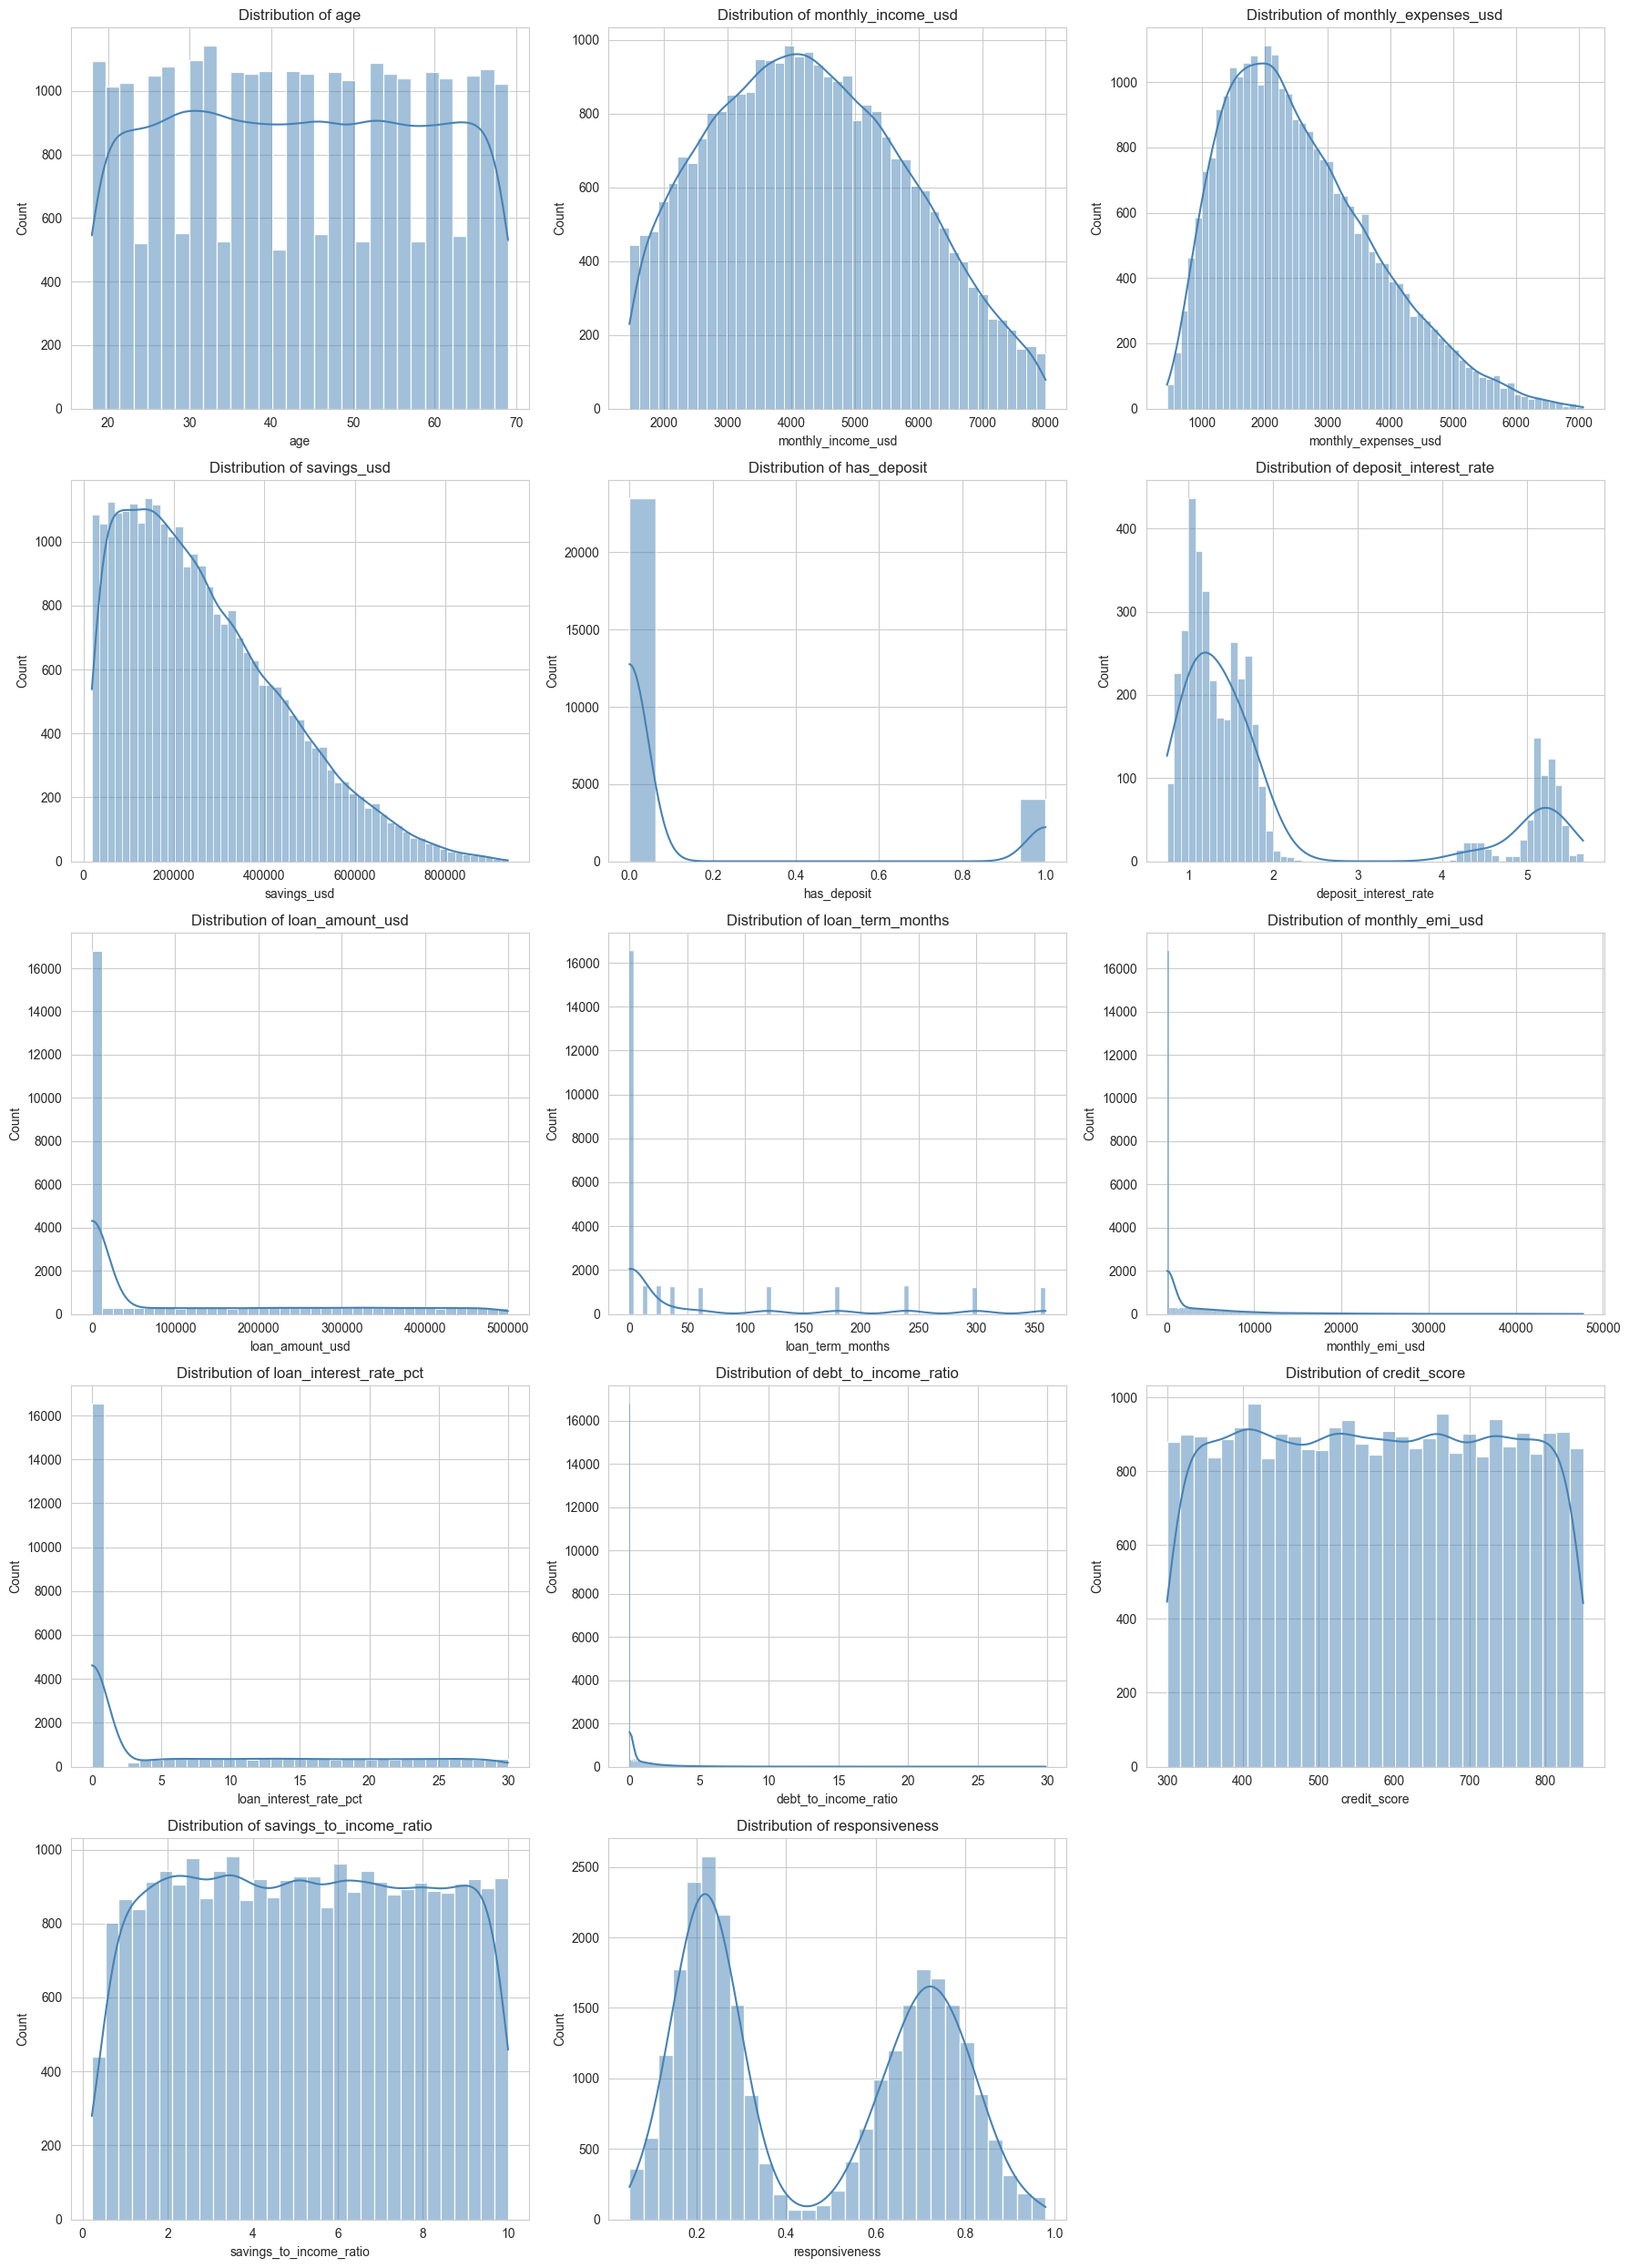

In [47]:
# 1. HISTOGRAMS AND KDE PLOTS FOR NUMERICAL FEATURES
fig, axes = plt.subplots(nrows=(len(numerical_cols)+2)//3, ncols=3, figsize=(18, 5*((len(numerical_cols)+2)//3)))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    sns.histplot(data=new_df, x=col, kde=True, ax=axes[idx], color='steelblue')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    
# Remove extra subplots
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

In [48]:
new_df.columns

Index(['age', 'gender', 'marital_status', 'education_level',
       'employment_status', 'job_title', 'monthly_income_usd',
       'monthly_expenses_usd', 'savings_usd', 'has_deposit',
       'deposit_interest_rate', 'has_loan', 'loan_type', 'loan_amount_usd',
       'loan_term_months', 'monthly_emi_usd', 'loan_interest_rate_pct',
       'debt_to_income_ratio', 'credit_score', 'savings_to_income_ratio',
       'age_bucket', 'responsiveness'],
      dtype='object')

In [96]:
df = pd.read_parquet('../data/financial_data_enriched_1.parquet')
df.drop(columns=['user_id', 'region', 'record_date'], inplace=True)

# Calculate 5th percentile thresholds
p5_income = df['monthly_income_usd'].quantile(0.1)
p5_savings = df['savings_usd'].quantile(0.05)

# Create mask for rows to drop
mask_drop = (df['monthly_income_usd'] > 8000) | (
    (df['monthly_income_usd'] < p5_income) | (df['savings_usd'] < p5_savings)
)

new_df = df.loc[~mask_drop]

def calculate_borrowing_power(df):
    """
    Vectorized calculation using quantile-based credit ranking.
    """
    # 1. Calculate percentile rank for credit score (vectorized)
    credit_rank = df['credit_score'].rank(pct=True).values
    
    # 2. Assign multipliers based on quantile ranges (vectorized with np.select)
    conditions = [
        credit_rank >= 0.8,  # Top 20%
        credit_rank >= 0.6,  # 60-80th percentile
        credit_rank >= 0.4,  # 40-60th percentile
        credit_rank >= 0.2,  # 20-40th percentile
        credit_rank < 0.2    # Bottom 20%
    ]
    multipliers = [12.0, 8.0, 5.0, 3.0, 1.0]
    
    max_limit_multiplier = np.select(conditions, multipliers)
    
    # 3. Calculate ability to borrow (vectorized)
    income = df['monthly_income_usd'].values
    current_debt = df['loan_amount_usd'].values
    
    ability_to_borrow = (income * max_limit_multiplier) - current_debt
    ability_to_borrow = np.maximum(0, ability_to_borrow)  # Floor at 0
    
    return ability_to_borrow

# Apply the vectorized function
new_df['borrowing_power_usd'] = calculate_borrowing_power(new_df)

/var/folders/8f/6znkn6r55qj5dgt5vxxlvwjm0000gn/T/ipykernel_86634/1014071683.py:44: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='borrowing_power_usd', ylabel='Count'>

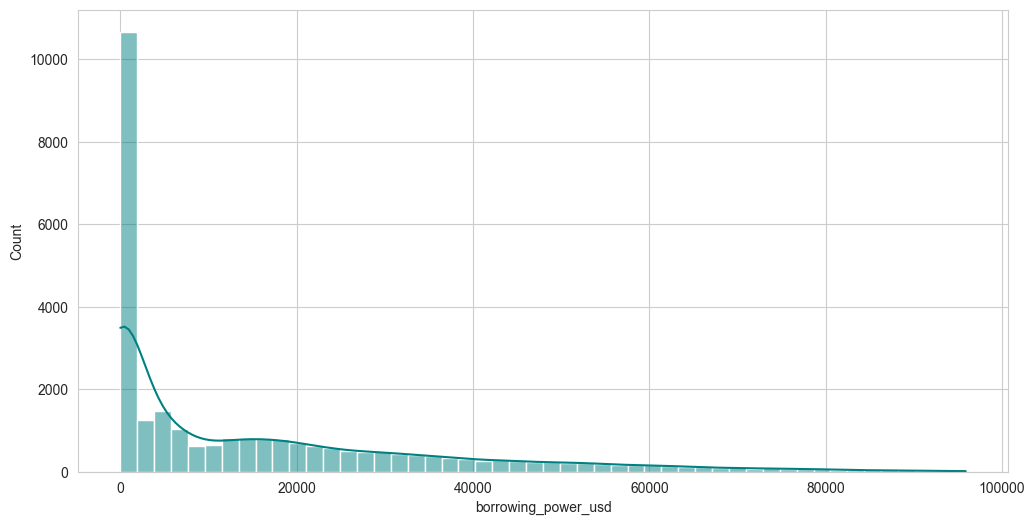

In [53]:
sns.histplot(new_df['borrowing_power_usd'], bins=50, kde=True, color='teal')

/var/folders/8f/6znkn6r55qj5dgt5vxxlvwjm0000gn/T/ipykernel_75949/168132458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['yeo_johnson'], lambda_yj = stats.yeojohnson(new_df['borrowing_power_usd'])


<Axes: xlabel='yeo_johnson', ylabel='Count'>

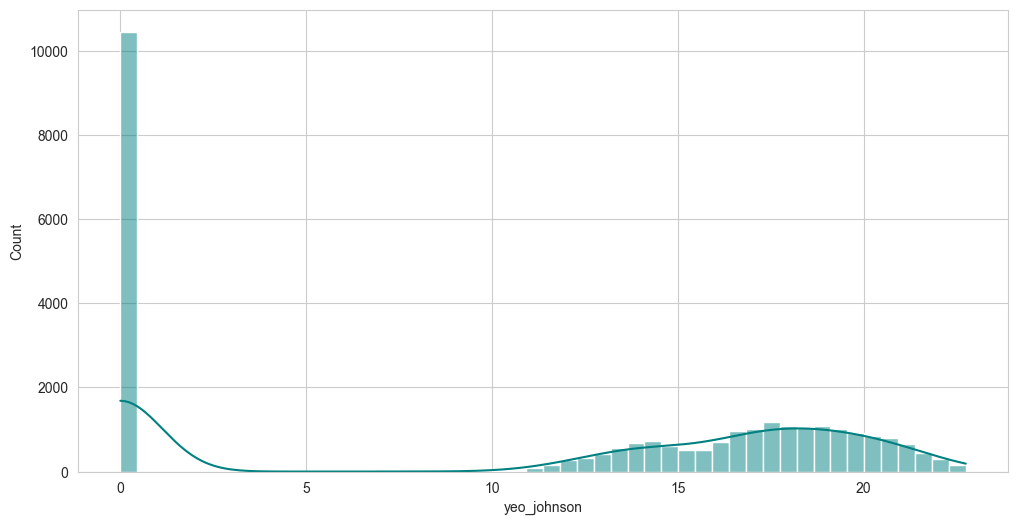

In [ ]:
from scipy import stats
new_df['yeo_johnson'], lambda_yj = stats.yeojohnson(new_df['borrowing_power_usd'])

sns.histplot(new_df['yeo_johnson'], bins=50, kde=True, color='teal')

In [57]:
new_df['has_borrowing_power'] = (new_df['borrowing_power_usd'] > 0).astype(int)

/var/folders/8f/6znkn6r55qj5dgt5vxxlvwjm0000gn/T/ipykernel_75949/827964648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['has_borrowing_power'] = (new_df['borrowing_power_usd'] > 0).astype(int)


/var/folders/8f/6znkn6r55qj5dgt5vxxlvwjm0000gn/T/ipykernel_86634/6214706.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/8f/6znkn6r55qj5dgt5vxxlvwjm0000gn/T/ipykernel_86634/6214706.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/8f/6znkn6r55qj5dgt5vxxlvwjm0000gn/T/ipykernel_86634/6214706.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

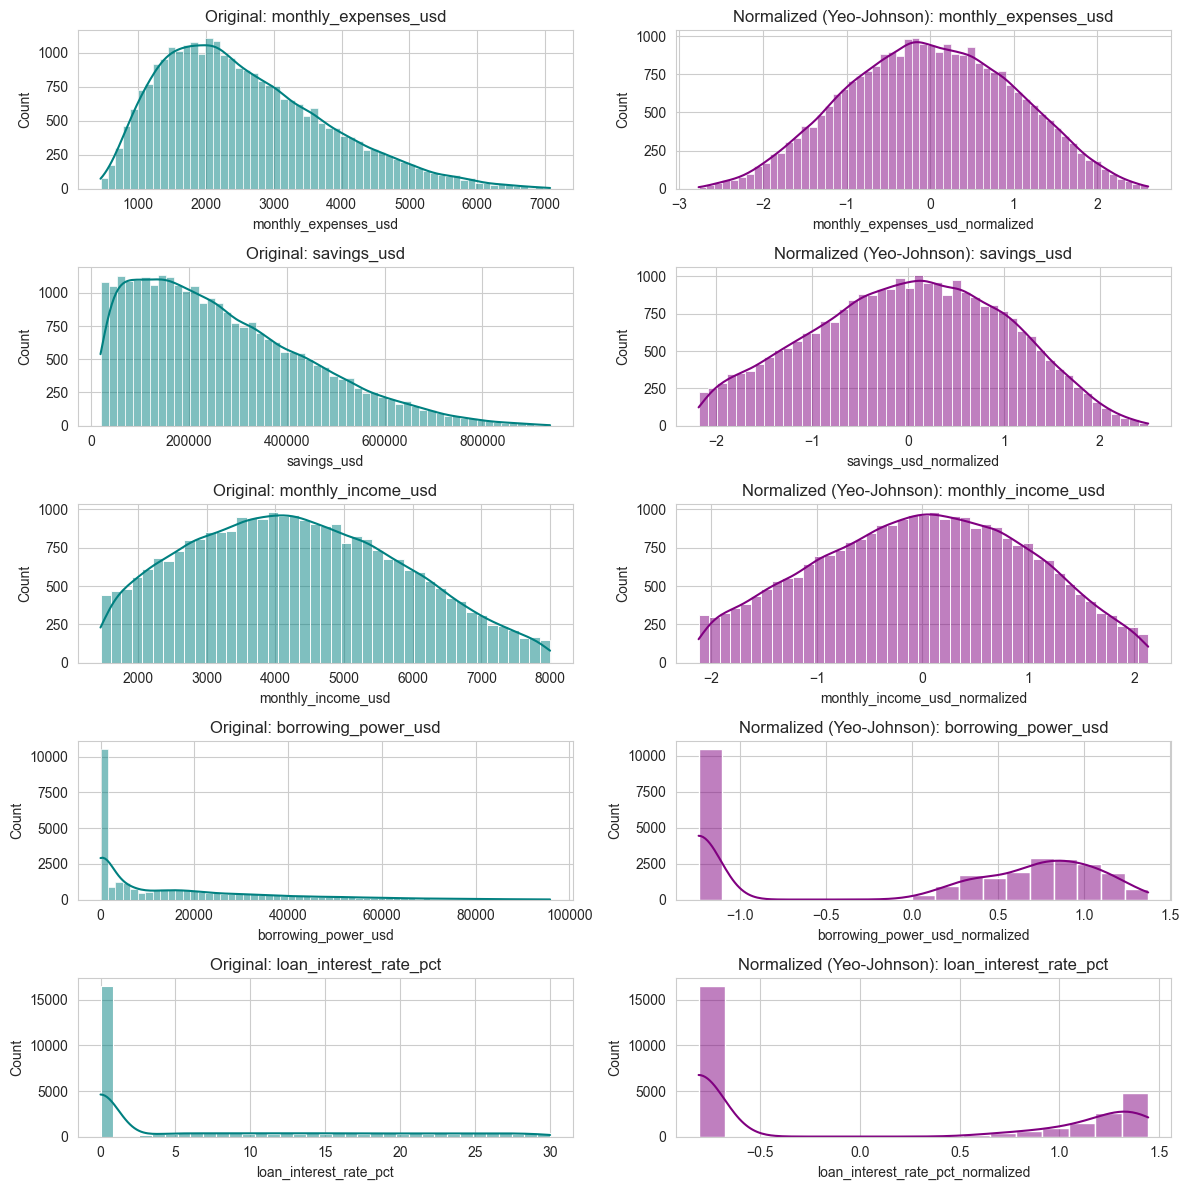


Yeo-Johnson Lambda Parameters:
monthly_expenses_usd: λ = 0.2702
savings_usd: λ = 0.3731
monthly_income_usd: λ = 0.5959
borrowing_power_usd: λ = 0.1083
loan_interest_rate_pct: λ = -0.5019


In [97]:
from sklearn.preprocessing import PowerTransformer

# 1. Select the skewed features
cols_to_fix = ['monthly_expenses_usd', 'savings_usd', 'monthly_income_usd', 'borrowing_power_usd', 'loan_interest_rate_pct'] # 'loan_amount_usd', 'monthly_emi_usd', 'loan_interest_rate_pct', 'debt_to_income_ratio',

# 2. Initialize the transformer (Yeo-Johnson is default)
pt = PowerTransformer(method='yeo-johnson', standardize=True)

# 3. Fit and Transform on new_df
transformed_data = pt.fit_transform(new_df[cols_to_fix])

# Assign back to new_df with suffix
for i, col in enumerate(cols_to_fix):
    new_df[f'{col}_normalized'] = transformed_data[:, i]

# 4. Visual Check: Before vs After
fig, axes = plt.subplots(len(cols_to_fix), 2, figsize=(12, 12))

for i, col in enumerate(cols_to_fix):
    # Original
    sns.histplot(new_df[col], kde=True, ax=axes[i, 0], color='teal')
    axes[i, 0].set_title(f'Original: {col}')
    
    # Transformed
    sns.histplot(new_df[f'{col}_normalized'], kde=True, ax=axes[i, 1], color='purple')
    axes[i, 1].set_title(f'Normalized (Yeo-Johnson): {col}')

plt.tight_layout()
plt.show()

# Print transformation parameters
print("\nYeo-Johnson Lambda Parameters:")
for i, col in enumerate(cols_to_fix):
    print(f"{col}: λ = {pt.lambdas_[i]:.4f}")

/var/folders/8f/6znkn6r55qj5dgt5vxxlvwjm0000gn/T/ipykernel_75949/2986355295.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[f'{col}_prob_low'] = probs_sorted[:, 0]
/var/folders/8f/6znkn6r55qj5dgt5vxxlvwjm0000gn/T/ipykernel_75949/2986355295.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[f'{col}_prob_high'] = probs_sorted[:, 1]
/var/folders/8f/6znkn6r55qj5dgt5vxxlvwjm0000gn/T/ipykernel_75949/2986355295.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

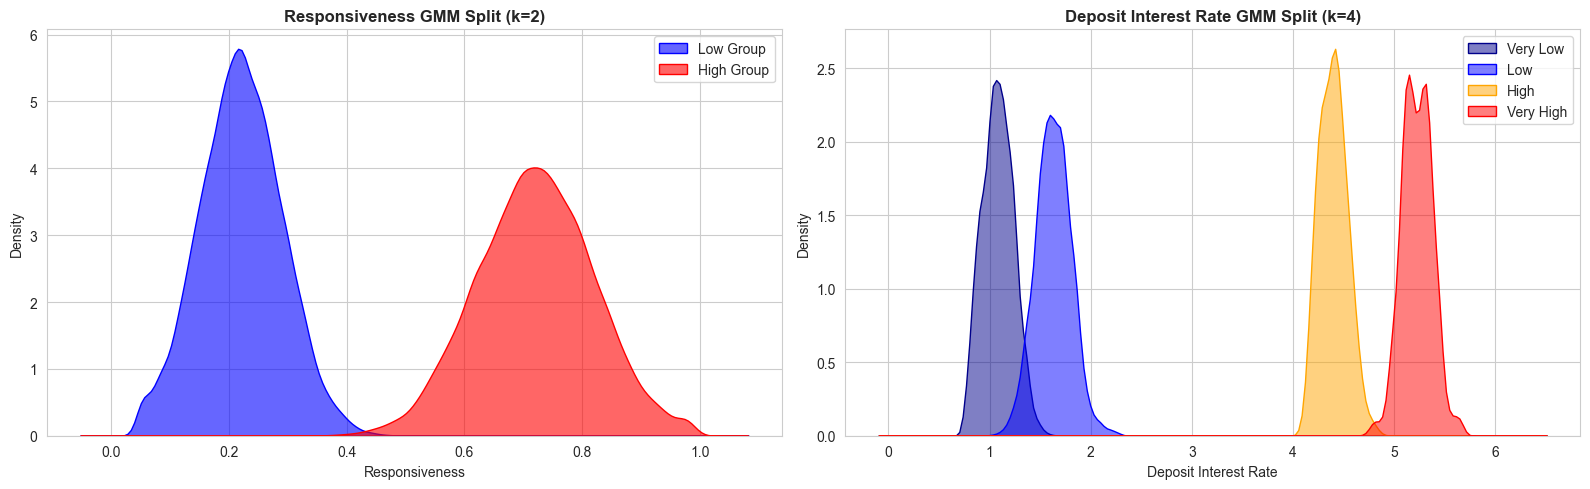


GMM CLUSTER STATISTICS

--- Responsiveness (k=2) ---
Low Group - Mean: 4.3952
High Group - Mean: 1.0810

--- Deposit Interest Rate (k=4) ---
Very Low Group - Mean: 1.0810
Low Group - Mean: 1.6295
High Group - Mean: 4.3952
Very High Group - Mean: 5.2218


In [74]:
from sklearn.mixture import GaussianMixture

# Different k values for each feature
features_config = {
    'responsiveness': 2,
    'deposit_interest_rate': 4
}

for col, gmm_k in features_config.items():
    # 1. Prepare Data (Reshape for sklearn)
    X = new_df[[col]].dropna().values
    
    # 2. Fit GMM
    gmm = GaussianMixture(n_components=gmm_k, random_state=42)
    gmm.fit(X)
    
    # 3. Predict Probabilities
    probs = gmm.predict_proba(new_df[[col]].fillna(new_df[col].mean()).values)
    
    # 4. Sort clusters by mean (ascending order)
    # Get sorted indices based on cluster means
    sorted_indices = np.argsort(gmm.means_.flatten())
    
    # Reorder probabilities according to sorted means
    probs_sorted = probs[:, sorted_indices]
    
    # 5. Assign to DataFrame with descriptive names
    if gmm_k == 2:
        new_df[f'{col}_prob_low'] = probs_sorted[:, 0]
        new_df[f'{col}_prob_high'] = probs_sorted[:, 1]
    elif gmm_k == 4:
        new_df[f'{col}_prob_very_low'] = probs_sorted[:, 0]
        new_df[f'{col}_prob_low'] = probs_sorted[:, 1]
        new_df[f'{col}_prob_high'] = probs_sorted[:, 2]
        new_df[f'{col}_prob_very_high'] = probs_sorted[:, 3]

# --- Visualization ---
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Responsiveness Split (k=2)
sns.kdeplot(data=new_df, x='responsiveness', weights=new_df['responsiveness_prob_low'], 
            ax=axes[0], color='blue', fill=True, label='Low Group', alpha=0.6)
sns.kdeplot(data=new_df, x='responsiveness', weights=new_df['responsiveness_prob_high'], 
            ax=axes[0], color='red', fill=True, label='High Group', alpha=0.6)
axes[0].set_title('Responsiveness GMM Split (k=2)', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].set_xlabel('Responsiveness')

# Plot 2: Deposit Interest Rate Split (k=4)
colors = ['darkblue', 'blue', 'orange', 'red']
labels = ['Very Low', 'Low', 'High', 'Very High']
prob_cols = ['deposit_interest_rate_prob_very_low', 'deposit_interest_rate_prob_low',
             'deposit_interest_rate_prob_high', 'deposit_interest_rate_prob_very_high']

for prob_col, color, label in zip(prob_cols, colors, labels):
    sns.kdeplot(data=new_df, x='deposit_interest_rate', weights=new_df[prob_col], 
                ax=axes[1], color=color, fill=True, label=label, alpha=0.5)

axes[1].set_title('Deposit Interest Rate GMM Split (k=4)', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].set_xlabel('Deposit Interest Rate')

plt.tight_layout()
plt.show()

# Print cluster statistics
print("\n" + "="*70)
print("GMM CLUSTER STATISTICS")
print("="*70)

print("\n--- Responsiveness (k=2) ---")
for i, label in enumerate(['Low', 'High']):
    print(f"{label} Group - Mean: {gmm.means_[i, 0]:.4f}")

print("\n--- Deposit Interest Rate (k=4) ---")
# Refit to get correct means for deposit_interest_rate
gmm_deposit = GaussianMixture(n_components=4, random_state=42)
gmm_deposit.fit(new_df[['deposit_interest_rate']].dropna().values)
sorted_means = np.sort(gmm_deposit.means_.flatten())

for i, (label, mean) in enumerate(zip(['Very Low', 'Low', 'High', 'Very High'], sorted_means)):
    print(f"{label} Group - Mean: {mean:.4f}")

In [81]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer
from sklearn.mixture import GaussianMixture

def load_and_clean_data(filepath):
    """Load data and remove unnecessary columns."""
    df = pd.read_parquet(filepath)
    df.drop(columns=['user_id', 'region', 'record_date'], inplace=True)
    return df

def fill_missing_values(df):
    """Fill null values: 0 for numeric, 'none' for text."""
    # Get numeric and text columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    text_cols = df.select_dtypes(include=['object', 'category']).columns
    
    # Fill numeric columns with 0
    df[numeric_cols] = df[numeric_cols].fillna(0)
    
    # Fill text columns with 'none'
    df[text_cols] = df[text_cols].fillna('none')
    
    return df

def remove_outliers(df, income_percentile=0.1, savings_percentile=0.05, max_income=8000):
    """Remove outliers based on income and savings thresholds."""
    p_income = df['monthly_income_usd'].quantile(income_percentile)
    p_savings = df['savings_usd'].quantile(savings_percentile)
    
    mask_keep = ~(
        (df['monthly_income_usd'] > max_income) | 
        (df['monthly_income_usd'] < p_income) | 
        (df['savings_usd'] < p_savings)
    )
    
    return df[mask_keep].copy()

def calculate_borrowing_power(df):
    """
    Calculate borrowing power using quantile-based credit ranking.
    Returns the borrowing power in USD.
    """
    # Calculate percentile rank for credit score
    credit_rank = df['credit_score'].rank(pct=True).values
    
    # Assign multipliers based on quantile ranges
    conditions = [
        credit_rank >= 0.8,  # Top 20%
        credit_rank >= 0.6,  # 60-80th percentile
        credit_rank >= 0.4,  # 40-60th percentile
        credit_rank >= 0.2,  # 20-40th percentile
        credit_rank < 0.2    # Bottom 20%
    ]
    multipliers = [12.0, 8.0, 5.0, 3.0, 1.0]
    max_limit_multiplier = np.select(conditions, multipliers)
    
    # Calculate borrowing power
    income = df['monthly_income_usd'].values
    current_debt = df['loan_amount_usd'].values
    borrowing_power = (income * max_limit_multiplier) - current_debt
    
    return np.maximum(0, borrowing_power)

def apply_power_transform(df, columns):
    """
    Apply Yeo-Johnson power transformation to specified columns.
    Adds new columns with '_normalized' suffix.
    """
    pt = PowerTransformer(method='yeo-johnson', standardize=True)
    transformed_data = pt.fit_transform(df[columns])
    
    for i, col in enumerate(columns):
        df[f'{col}_normalized'] = transformed_data[:, i]
    
    return df, pt

def apply_gmm_clustering(df, features_config):
    """
    Apply Gaussian Mixture Model clustering to specified features.
    
    Parameters:
    -----------
    df : DataFrame
    features_config : dict
        Dictionary with feature names as keys and number of components as values.
        Example: {'responsiveness': 2, 'deposit_interest_rate': 4}
    """
    for col, n_components in features_config.items():
        # Prepare data (no need to handle NaNs since they're already filled)
        X = df[[col]].values
        
        # Fit GMM
        gmm = GaussianMixture(n_components=n_components, random_state=42)
        gmm.fit(X)
        
        # Predict probabilities
        probs = gmm.predict_proba(df[[col]].values)
        
        # Sort clusters by mean (ascending order)
        sorted_indices = np.argsort(gmm.means_.flatten())
        probs_sorted = probs[:, sorted_indices]
        
        # Assign probability columns
        if n_components == 2:
            df[f'{col}_prob_low'] = probs_sorted[:, 0]
            df[f'{col}_prob_high'] = probs_sorted[:, 1]
        elif n_components == 4:
            df[f'{col}_prob_very_low'] = probs_sorted[:, 0]
            df[f'{col}_prob_low'] = probs_sorted[:, 1]
            df[f'{col}_prob_high'] = probs_sorted[:, 2]
            df[f'{col}_prob_very_high'] = probs_sorted[:, 3]
    
    return df

def preprocess_pipeline(filepath):
    """
    Complete preprocessing pipeline.
    
    Returns:
    --------
    df : DataFrame
        Preprocessed dataframe with all engineered features
    """
    # Load data
    df = load_and_clean_data(filepath)
    
    # Fill missing values FIRST
    df = fill_missing_values(df)
    
    # Remove outliers
    df = remove_outliers(df)
    
    # Calculate borrowing power
    df['borrowing_power_usd'] = calculate_borrowing_power(df)
    df['has_borrowing_power'] = (df['borrowing_power_usd'] > 0).astype(int)
    
    # Apply power transformations
    cols_to_transform = [
        'monthly_expenses_usd', 
        'savings_usd', 
        'monthly_income_usd', 
        'borrowing_power_usd'
    ]
    df, _ = apply_power_transform(df, cols_to_transform)
    
    # Apply GMM clustering
    gmm_config = {
        'responsiveness': 2,
        'deposit_interest_rate': 4
    }
    df = apply_gmm_clustering(df, gmm_config)
    
    return df

# Usage
if __name__ == "__main__":
    filepath = '../data/financial_data_enriched_1.parquet'
    new_df = preprocess_pipeline(filepath)
    
    # Save preprocessed data
    new_df.to_parquet('../data/financial_data_preprocessed_1.parquet', index=False)
    print(f"Preprocessing complete. Shape: {new_df.shape}")
    print(f"Missing values remaining: {new_df.isnull().sum().sum()}")

Preprocessing complete. Shape: (27548, 34)
Missing values remaining: 0


In [93]:
import pandas as pd
proc_df = pd.read_parquet('../data/financial_data_preprocessed_1.parquet')
proc_df

age  gender marital_status education_level employment_status  \
0       56  Female        married     High School     Self-employed   
1       19  Female         single             PhD          Employed   
2       20  Female        married          Master          Employed   
3       25    Male        married             PhD          Employed   
4       53  Female         single             PhD          Employed   
...    ...     ...            ...             ...               ...   
27543   60    Male        married     High School          Employed   
27544   30  Female        married     High School          Employed   
27545   18  Female         single        Bachelor     Self-employed   
27546   36   Other        married     High School     Self-employed   
27547   39  Female        married          Master          Employed   

         job_title  monthly_income_usd  monthly_expenses_usd  savings_usd  \
0      Salesperson             3531.69               1182.59    367655.03   
1      Salesperson             3531.73               2367.99    260869.10   
2          Teacher             2799.49               1003.91    230921.21   
3          Manager             5894.88               4440.12    304815.51   
4          Student             5128.93               4137.61    461509.48   
...            ...                 ...                   ...          ...   
27543      Manager             5223.10               3347.34     85547.65   
27544  Salesperson             4266.87               1510.82    273669.70   
27545       Doctor             3282.38               2243.77     22081.21   
27546   Accountant             5035.99               4054.32    524039.88   
27547     Engineer             4410.19               2866.47    176985.54   

       has_deposit  ...  monthly_expenses_usd_normalized  \
0                0  ...                        -1.307704   
1                0  ...                        -0.007810   
2                0  ...                        -1.580365   
3                0  ...                         1.399305   
4                0  ...                         1.229186   
...            ...  ...                              ...   
27543            0  ...                         0.737280   
27544            0  ...                        -0.876739   
27545            0  ...                        -0.117658   
27546            0  ...                         1.180759   
27547            0  ...                         0.394799   

      savings_usd_normalized monthly_income_usd_normalized  \
0                   0.703925                     -0.435449   
1                   0.186716                     -0.435421   
2                   0.018282                     -0.964787   
3                   0.413204                      1.026220   
4                   1.084969                      0.583996   
...                      ...                           ...   
27543              -1.102028                      0.639739   
27544               0.255008                      0.052908   
27545              -2.093013                     -0.610212   
27546               1.312435                      0.528574   
27547              -0.323603                      0.144017   

       borrowing_power_usd_normalized  responsiveness_prob_low  \
0                            0.592521             9.999991e-01   
1                           -1.239450             9.999999e-01   
2                            0.977397             9.999969e-01   
3                           -1.239450             1.102989e-08   
4                            0.711745             1.241700e-15   
...                               ...                      ...   
27543                        0.889260             9.999973e-01   
27544                       -1.239450             2.769321e-11   
27545                        0.247952             9.999988e-01   
27546                        0.876689             1.314913e-15   
27547                        0.994835

In [65]:
# Create a copy to avoid modifying original
proc_new_df = proc_df.drop(columns=[
    'age', 'gender', 'marital_status', 'education_level', 'employment_status', 
    'job_title', 
    
    'loan_amount_usd', 'loan_term_months', 'monthly_emi_usd', 
    'debt_to_income_ratio', 'age_bucket', 'loan_interest_rate_pct',

    'loan_type',

    'monthly_income_usd', 'monthly_expenses_usd', 'savings_usd', 'deposit_interest_rate', 'responsiveness', 'borrowing_power_usd'
])

proc_new_df["has_loan"] = (
    proc_new_df["has_loan"]
    .astype(str).str.strip().str.lower()
    .map({"yes": 1, "no": 0})
    .fillna(0)
    .astype(int)
)

In [33]:
proc_new_df.columns

Index(['has_deposit', 'has_loan', 'loan_type', 'credit_score',
       'savings_to_income_ratio', 'has_borrowing_power',
       'monthly_expenses_usd_normalized', 'savings_usd_normalized',
       'monthly_income_usd_normalized', 'borrowing_power_usd_normalized',
       'responsiveness_prob_low', 'responsiveness_prob_high',
       'deposit_interest_rate_prob_very_low', 'deposit_interest_rate_prob_low',
       'deposit_interest_rate_prob_high',
       'deposit_interest_rate_prob_very_high'],
      dtype='object')

In [36]:
proc_new_df

has_deposit  has_loan  loan_type  credit_score  \
0                0         0       none           430   
1                0         1  Education           543   
2                0         0       none           754   
3                0         1   Business           461   
4                0         0       none           516   
...            ...       ...        ...           ...   
27543            0         0       none           553   
27544            0         1        Car           434   
27545            0         0       none           391   
27546            0         0       none           596   
27547            0         0       none           689   

       savings_to_income_ratio  has_borrowing_power  \
0                         8.68                    1   
1                         6.16                    0   
2                         6.87                    1   
3                         4.31                    0   
4                         7.50                    1   
...                        ...                  ...   
27543                     1.36                    1   
27544                     5.34                    0   
27545                     0.56                    1   
27546                     8.67                    1   
27547                     3.34                    1   

       monthly_expenses_usd_normalized  savings_usd_normalized  \
0                            -1.307704                0.703925   
1                            -0.007810                0.186716   
2                            -1.580365                0.018282   
3                             1.399305                0.413204   
4                             1.229186                1.084969   
...                                ...                     ...   
27543                         0.737280               -1.102028   
27544                        -0.876739                0.255008   
27545                        -0.117658               -2.093013   
27546                         1.180759                1.312435   
27547                         0.394799               -0.323603   

       monthly_income_usd_normalized  borrowing_power_usd_normalized  \
0                          -0.435449                        0.592521   
1                          -0.435421                       -1.239450   
2                          -0.964787                        0.977397   
3                           1.026220                       -1.239450   
4                           0.583996                        0.711745   
...                              ...                             ...   
27543                       0.639739                        0.889260   
27544                       0.052908                       -1.239450   
27545                      -0.610212                        0.247952   
27546                       0.528574                        0.876689   
27547                       0.144017                        0.994835   

       responsiveness_prob_low  responsiveness_prob_high  \
0                 9.999991e-01              9.445203e-07   
1                 9.999999e-01              1.271673e-07   
2                 9.999969e-01              3.146067e-06   
3                 1.102989e-08              1.000000e+00   
4                 1.241700e-15              1.000000e+00   
...                        ...                       ...   
27543             9.999973e-01              2.652703e-06   
27544             2.769321e-11              1.000000e+00   
27545             9.999988e-01              1.191568e-06   
27546             1.314913e-15              1.000000e+00   
27547             1.000000e+00              4.205684e-09   

       deposit_interest_rate_prob_very_low  deposit_interest_rate_prob_low  \
0                                      1.0                    6.406204e-15   
1                                      1.0                    6.406204e-15   
2                                      1.0      

In [66]:
proc_new_df_5k = proc_new_df.sample(n=10000, random_state=42)

ENGINEERED FEATURES SUMMARY

Original features: 34
New engineered features: 5
Total features: 43

--- New Features ---
  • financial_health_score
  • financial_runway_yj
  • monthly_savings_usd_yj
  • monthly_savings_rate
  • savings_momentum_yj

--- Transformation Lambdas ---
  • financial_runway_yj: λ = 0.4136
  • monthly_savings_usd_yj: λ = 0.2905
  • savings_momentum_yj: λ = 0.1781

--- Feature Statistics ---
                             mean       std        min        max
financial_health_score   0.496616  0.289114   0.000000   1.000000
financial_runway_yj     13.871464  4.728184   1.990114  26.334823
monthly_savings_usd_yj  25.425505  5.228636  11.313317  38.417299
monthly_savings_rate     0.399142  0.173199   0.100012   0.699994
savings_momentum_yj      7.307598  1.962854   1.646298  11.927820


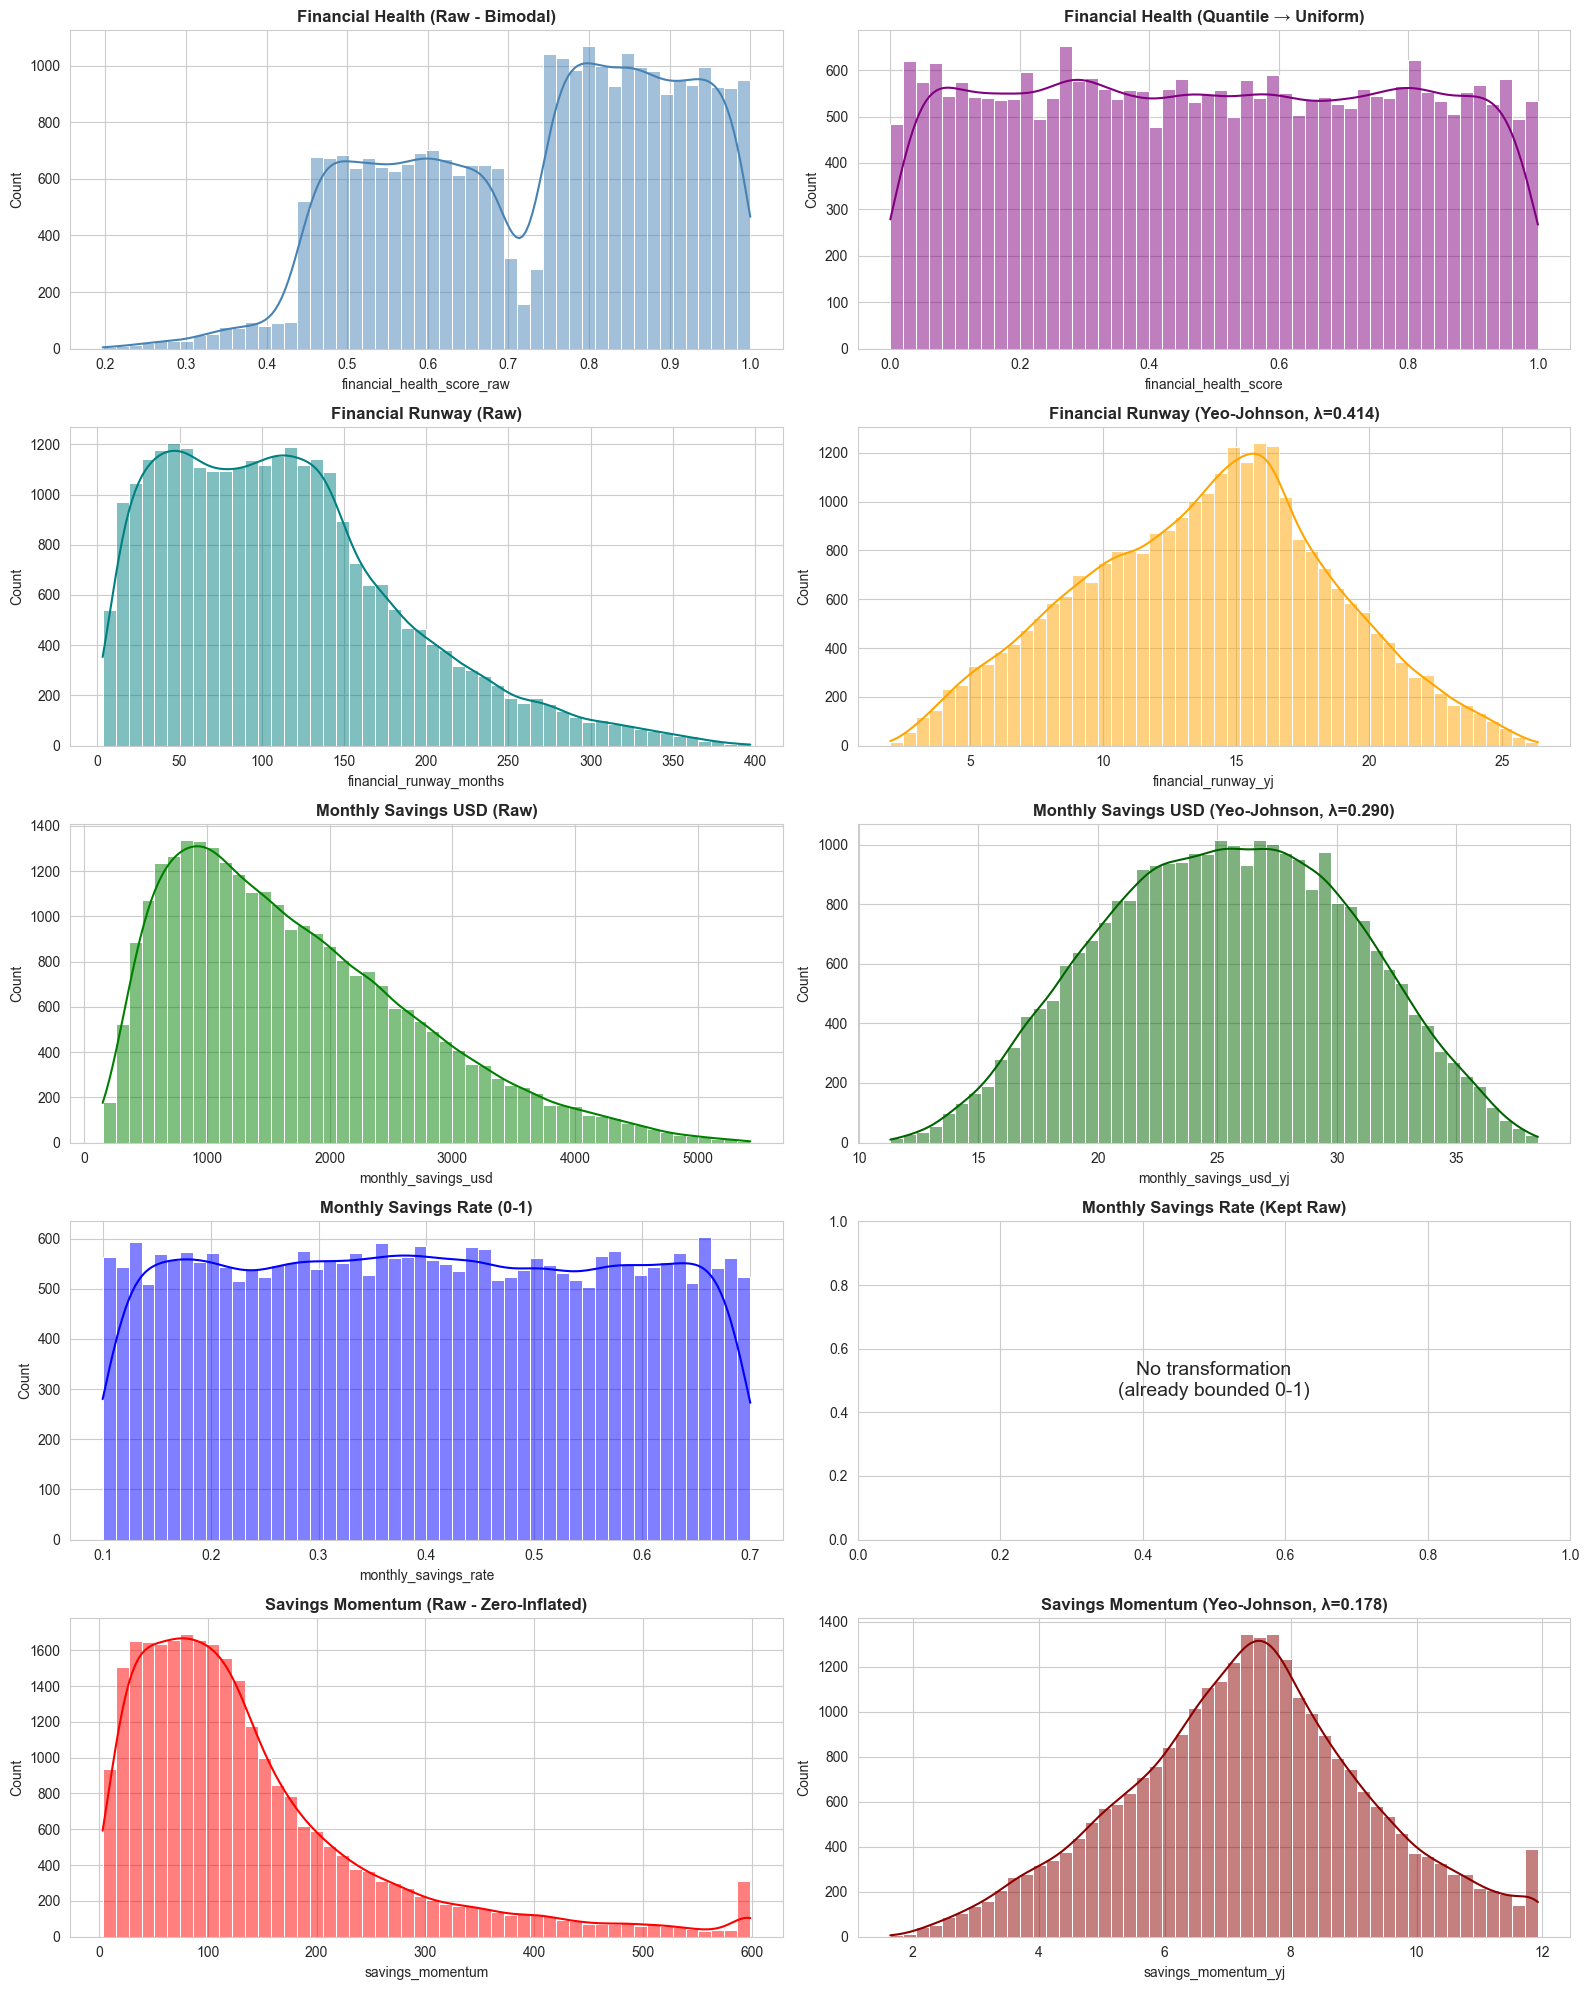

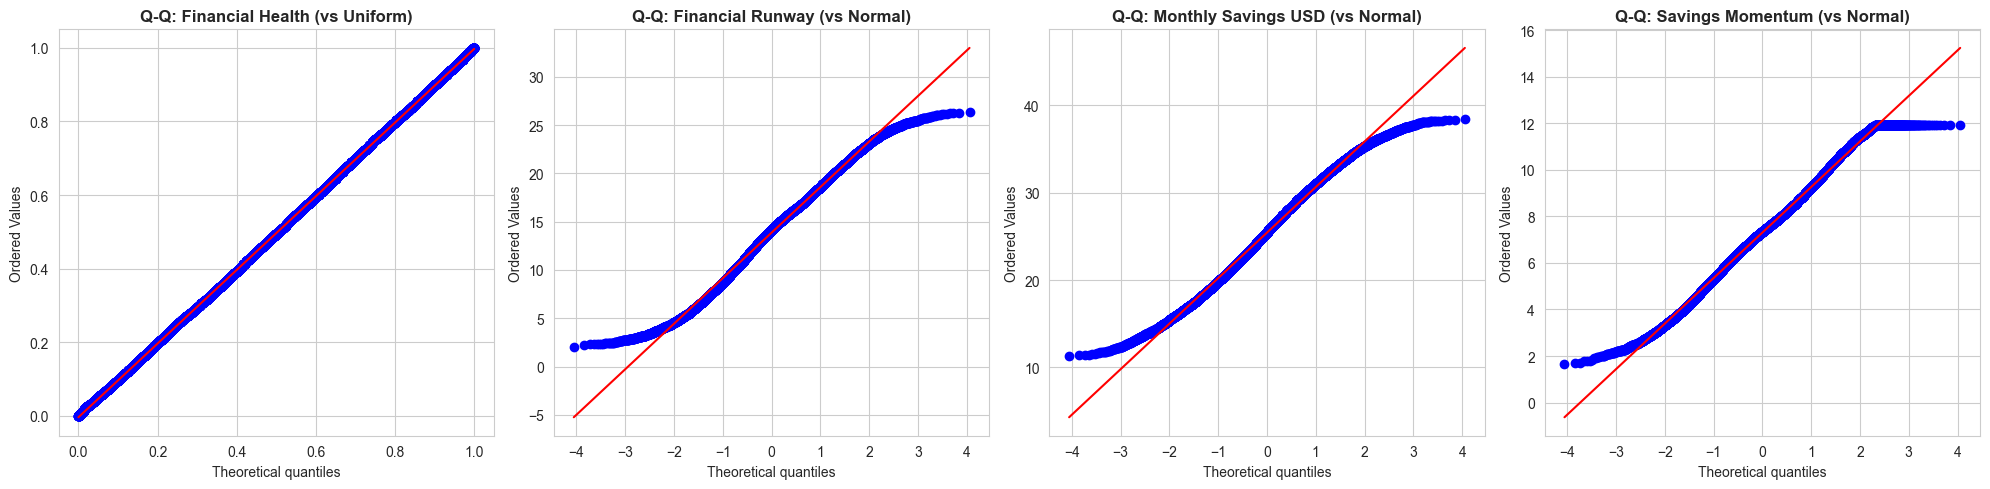

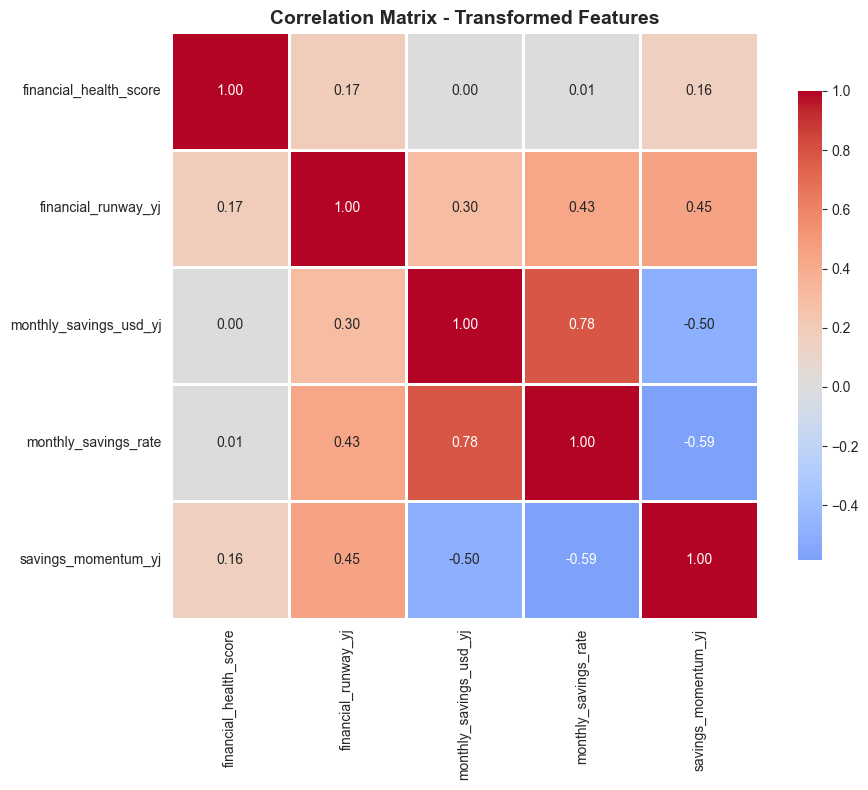


DATA QUALITY CHECK
Missing values: 0
Infinite values: 0

✅ Final feature count: 17
✅ Features kept for clustering: ['has_deposit', 'has_loan', 'credit_score', 'savings_to_income_ratio', 'has_borrowing_power', 'monthly_expenses_usd_normalized', 'savings_usd_normalized', 'monthly_income_usd_normalized', 'borrowing_power_usd_normalized', 'responsiveness_prob_high', 'deposit_interest_rate_prob_high', 'deposit_interest_rate_prob_very_high', 'financial_health_score', 'financial_runway_yj', 'monthly_savings_usd_yj', 'monthly_savings_rate', 'savings_momentum_yj']

✅ Saved to: financial_data_features_engineered.parquet


In [ ]:
# ============================================================
# ENGINEERED FEATURES FOR CLUSTERING
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import QuantileTransformer

proc_df = pd.read_parquet('../data/financial_data_preprocessed_1.parquet')

# Create a copy to avoid modifying original
proc_new_df = proc_df.copy()

# Fix has_loan encoding
proc_new_df["has_loan"] = (
    proc_new_df["has_loan"]
    .astype(str).str.strip().str.lower()
    .map({"yes": 1, "no": 0})
    .fillna(0)
    .astype(int)
)

# ============================================================
# 1. FINANCIAL HEALTH COMPOSITE SCORE
# ============================================================
proc_new_df['financial_health_score_raw'] = (
    proc_new_df['credit_score'] / 850 * 0.4 +
    proc_new_df['savings_to_income_ratio'].clip(0, 2) / 2 * 0.3 +
    (proc_new_df['has_borrowing_power']) * 0.3
)

# Transform to uniform distribution
qt = QuantileTransformer(output_distribution='uniform', random_state=42)
proc_new_df['financial_health_score'] = qt.fit_transform(
    proc_new_df[['financial_health_score_raw']]
)

# ============================================================
# 2. FINANCIAL RUNWAY (Stability Metric)
# ============================================================
proc_new_df['financial_runway_months'] = (
    proc_new_df['savings_usd'] / 
    (proc_new_df['monthly_expenses_usd'] + 1e-6)
)
#.clip(upper=60)  # Cap at 5 years

# Apply Yeo-Johnson
runway_transformed, lambda_runway = stats.yeojohnson(
    proc_new_df['financial_runway_months']
)
proc_new_df['financial_runway_yj'] = runway_transformed

# ============================================================
# 3. MONTHLY SAVINGS USD
# ============================================================
proc_new_df['monthly_savings_usd'] = (
    proc_new_df['monthly_income_usd'] - 
    proc_new_df['monthly_expenses_usd']
)

# Apply Yeo-Johnson (handles negative values + skewness)
savings_usd_transformed, lambda_savings_usd = stats.yeojohnson(
    proc_new_df['monthly_savings_usd']
)
proc_new_df['monthly_savings_usd_yj'] = savings_usd_transformed

# ============================================================
# 4. MONTHLY SAVINGS RATE
# ============================================================
proc_new_df['monthly_savings_rate'] = (
    proc_new_df['monthly_savings_usd'] / 
    (proc_new_df['monthly_income_usd'] + 1e-6)
).clip(0, 1)

# ============================================================
# 5. SAVINGS MOMENTUM (Wealth Growth Velocity)
# ============================================================
# Monthly growth rate of savings (can be negative/zero)
growth_rate = proc_new_df['monthly_savings_usd'] / (proc_new_df['savings_usd'] + 1e-6)

# Doubling time under multiplicative growth: t = log(2) / log(1 + r)
# If r <= 0 -> cannot double (set to inf)
proc_new_df['savings_momentum'] = np.where(
    growth_rate > 0,
    np.log(2.0) / np.log1p(growth_rate),
    np.inf
)

# Clip at the 99th percentile (use only finite values to compute p99)
finite_mask = np.isfinite(proc_new_df['savings_momentum'])
savings_momentum_p99 = proc_new_df.loc[finite_mask, 'savings_momentum'].quantile(0.99)

# Replace inf with p99, then clip (keeps distribution bounded)
proc_new_df.loc[~finite_mask, 'savings_momentum'] = savings_momentum_p99
proc_new_df['savings_momentum'] = proc_new_df['savings_momentum'].clip(upper=savings_momentum_p99)

# Apply Yeo-Johnson (handles skewness)
momentum_transformed, lambda_momentum = stats.yeojohnson(proc_new_df['savings_momentum'])
proc_new_df['savings_momentum_yj'] = momentum_transformed

# ============================================================
# PRINT SUMMARY
# ============================================================
new_features = [
    'financial_health_score',       # Quantile transformed (uniform)
    'financial_runway_yj',          # Yeo-Johnson transformed
    'monthly_savings_usd_yj',       # Yeo-Johnson transformed
    'monthly_savings_rate',         # Raw (0-1 bounded)
    'savings_momentum_yj'           # Yeo-Johnson transformed
]

print("="*70)
print("ENGINEERED FEATURES SUMMARY")
print("="*70)
print(f"\nOriginal features: {len(proc_df.columns)}")
print(f"New engineered features: {len(new_features)}")
print(f"Total features: {len(proc_new_df.columns)}")

print("\n--- New Features ---")
for feat in new_features:
    print(f"  • {feat}")

print("\n--- Transformation Lambdas ---")
print(f"  • financial_runway_yj: λ = {lambda_runway:.4f}")
print(f"  • monthly_savings_usd_yj: λ = {lambda_savings_usd:.4f}")
print(f"  • savings_momentum_yj: λ = {lambda_momentum:.4f}")

print("\n--- Feature Statistics ---")
print(proc_new_df[new_features].describe().T[['mean', 'std', 'min', 'max']])

# ============================================================
# VISUALIZE NEW FEATURES (BEFORE & AFTER)
# ============================================================
fig, axes = plt.subplots(5, 2, figsize=(16, 20))

# Row 1: Financial Health
sns.histplot(proc_new_df['financial_health_score_raw'], bins=50, kde=True, 
             ax=axes[0,0], color='steelblue')
axes[0,0].set_title('Financial Health (Raw - Bimodal)', fontsize=12, fontweight='bold')

sns.histplot(proc_new_df['financial_health_score'], bins=50, kde=True, 
             ax=axes[0,1], color='purple')
axes[0,1].set_title('Financial Health (Quantile → Uniform)', fontsize=12, fontweight='bold')

# Row 2: Financial Runway
sns.histplot(proc_new_df['financial_runway_months'], bins=50, kde=True, 
             ax=axes[1,0], color='teal')
axes[1,0].set_title('Financial Runway (Raw)', fontsize=12, fontweight='bold')

sns.histplot(proc_new_df['financial_runway_yj'], bins=50, kde=True, 
             ax=axes[1,1], color='orange')
axes[1,1].set_title(f'Financial Runway (Yeo-Johnson, λ={lambda_runway:.3f})', fontsize=12, fontweight='bold')

# Row 3: Monthly Savings USD
sns.histplot(proc_new_df['monthly_savings_usd'], bins=50, kde=True, 
             ax=axes[2,0], color='green')
axes[2,0].set_title('Monthly Savings USD (Raw)', fontsize=12, fontweight='bold')

sns.histplot(proc_new_df['monthly_savings_usd_yj'], bins=50, kde=True, 
             ax=axes[2,1], color='darkgreen')
axes[2,1].set_title(f'Monthly Savings USD (Yeo-Johnson, λ={lambda_savings_usd:.3f})', fontsize=12, fontweight='bold')

# Row 4: Monthly Savings Rate
sns.histplot(proc_new_df['monthly_savings_rate'], bins=50, kde=True, 
             ax=axes[3,0], color='blue')
axes[3,0].set_title('Monthly Savings Rate (0-1)', fontsize=12, fontweight='bold')

axes[3,1].text(0.5, 0.5, 'No transformation\n(already bounded 0-1)', 
               ha='center', va='center', transform=axes[3,1].transAxes, fontsize=14)
axes[3,1].set_title('Monthly Savings Rate (Kept Raw)', fontsize=12, fontweight='bold')

# Row 5: Savings Momentum
sns.histplot(proc_new_df['savings_momentum'], bins=50, kde=True, 
             ax=axes[4,0], color='red')
axes[4,0].set_title('Savings Momentum (Raw - Zero-Inflated)', fontsize=12, fontweight='bold')

sns.histplot(proc_new_df['savings_momentum_yj'], bins=50, kde=True, 
             ax=axes[4,1], color='darkred')
axes[4,1].set_title(f'Savings Momentum (Yeo-Johnson, λ={lambda_momentum:.3f})', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================
# Q-Q PLOTS TO VERIFY TRANSFORMATIONS
# ============================================================
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

stats.probplot(proc_new_df['financial_health_score'], dist="uniform", plot=axes[0])
axes[0].set_title('Q-Q: Financial Health (vs Uniform)', fontsize=12, fontweight='bold')

stats.probplot(proc_new_df['financial_runway_yj'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q: Financial Runway (vs Normal)', fontsize=12, fontweight='bold')

stats.probplot(proc_new_df['monthly_savings_usd_yj'], dist="norm", plot=axes[2])
axes[2].set_title('Q-Q: Monthly Savings USD (vs Normal)', fontsize=12, fontweight='bold')

stats.probplot(proc_new_df['savings_momentum_yj'], dist="norm", plot=axes[3])
axes[3].set_title('Q-Q: Savings Momentum (vs Normal)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================
# CORRELATION HEATMAP
# ============================================================
plt.figure(figsize=(10, 8))
corr_matrix = proc_new_df[new_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix - Transformed Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================
# DATA QUALITY CHECK
# ============================================================
print("\n" + "="*70)
print("DATA QUALITY CHECK")
print("="*70)
print(f"Missing values: {proc_new_df[new_features].isnull().sum().sum()}")
print(f"Infinite values: {np.isinf(proc_new_df[new_features]).sum().sum()}")

# Check for any infinite values
for feat in new_features:
    inf_count = np.isinf(proc_new_df[feat]).sum()
    if inf_count > 0:
        print(f"⚠️  {feat} has {inf_count} infinite values")

# ============================================================
# DROP UNNECESSARY COLUMNS & SAVE
# ============================================================
proc_new_df = proc_new_df.drop(columns=[
    # Demographic
    'age', 'gender', 'marital_status', 'education_level', 
    'employment_status', 'job_title', 
    
    # Loan details
    'loan_amount_usd', 'loan_term_months', 'monthly_emi_usd', 
    'debt_to_income_ratio', 'age_bucket', 'loan_interest_rate_pct',
    'loan_type',
    
    # Non-normalized features
    'monthly_income_usd', 'monthly_expenses_usd', 'savings_usd', 
    'deposit_interest_rate', 'responsiveness', 'borrowing_power_usd',
    
    # Intermediate/raw features
    'monthly_savings_usd',
    'financial_health_score_raw',
    'financial_runway_months',
    'savings_momentum',
    
    # GMM probabilities we don't need
    'responsiveness_prob_low',
    'deposit_interest_rate_prob_very_low',
])

print(f"\n✅ Final feature count: {len(proc_new_df.columns)}")
print(f"✅ Features kept for clustering: {proc_new_df.columns.tolist()}")

# Save updated dataframe
proc_new_df.to_parquet('../data/financial_data_features_engineered.parquet', index=False)
print("\n✅ Saved to: financial_data_features_engineered.parquet")